# Breast Cancer Data Analysis and Predictions

## Load libraries and read the data

In [2]:
# Python load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,mean_squared_error,roc_auc_score,roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from warnings import filterwarnings
filterwarnings('ignore')#ignore warning messages 
import warnings as wrn
wrn.filterwarnings('ignore',category=DeprecationWarning)
wrn.filterwarnings('ignore',category=FutureWarning)
wrn.filterwarnings('ignore',category=UserWarning)

In [3]:
# reading data into the dataframe
pd.set_option('display.max_columns',None)
df=pd.read_csv('data.csv')
df

id diagnosis radius_mean texture_mean perimeter_mean area_mean  \
0      842302         M       17.99        10.38          122,8      1001   
1      842517         M       2O.57        17.77          132.9      1326   
2    84300903         M       19.69        21.25            130      1203   
3    84348301         M       11.42        20.38          77.58     386.1   
4    84358402         M       20.29        14.34          135.1      1297   
..        ...       ...         ...          ...            ...       ...   
564    926424         M       21.56        22.39            142      1479   
565    926682         M       2O.I3        28.25          131.2      1261   
566    926954         M        16.6        28.08          108.3     858.1   
567    927241         M        20.6        29.33          14O.I      1265   
568     92751         B        7.76        24.54          47.92       181   

    smoothness_mean compactness_mean concavity_mean concave points_mean  \
0            O.I184           0.2776         0.3001              O.I471   
1           0.08474          0.07864         0.0869             0.07017   
2            O.I096           O.I599         O.I974              O.I279   
3            O.I425           0.2839         0.2414              O.I052   
4            O.I003           O.I328          O.I98              O.I043   
..              ...              ...            ...                 ...   
564           O.I11           O.I159         0.2439              O.I389   
565          0.0978           O.I034          O.I44             0.09791   
566         0.08455           O.I023        0.09251             0.05302   
567          O.I178            0.277         0.3514               O.I52   
568         0.05263          0.04362              0                   0   

    symmetry_mean  fractal_dimension_mean radius_se texture_se perimeter_se  \
0          0.2419                 0.07871     1.095     0.9053        8.589   
1          O.I812                 0.05667    O.5435     0.7339        3.398   
2          0.2069                 0.05999    0.7456     0.7869        4.585   
3          0.2597                 0.09744    0.4956      1.156        3.445   
4          O.I809                 0.05883    0.7572     0.7813        5.438   
..            ...                     ...       ...        ...          ...   
564        O.I726                 0.05623     1.176      1.256        7.673   
565        O.I752                 0.05533    0.7655      2.463        5.203   
566         O.I59                 0.05648    0.4564      1.075        3.425   
567        0.2397                 0.07016     0.726      1.595        5.772   
568        O.I587                 0.05884    0.3857      1.428        2.548   

    area_se  smoothness_se compactness_se concavity_se  concave points_se  \
0     153.4       0.006399        0.04904      0.05373            0.01587   
1     74.08       0.005225        0.01308       0.0186            0.01340   
2     94.03       0.006150        0.04006      0.03832            0.02058   
3     27.23       0.009110        0.07458      0.05661            0.01867   
4     94.44       0.011490        0.02461      0.05688            0.01885   
..      ...            ...            ...          ...                ...   
564   158.7       0.010300        0.02891      0.05198            0.02454   
565   99.04       0.005769        0.02423       0.0395            0.01678   
566   48.55       0.005903        0.03731       0.0473            0.01557   
567   86.22       0.006522        0.06158      0.07117            0.01664   
568   19.15       0.007189        0.00466            0            0.00000   

     symmetry_se  fractal_dimension_se radius_worst texture_worst  \
0        0.03003              0.006193        25,38         17.33   
1        0.01389              0.003532        24.99         23.41   
2        0.02250              0.004571        23.57         25.53   
3        0.05963              0.009

##  Exploratory Data Analysis

In [4]:
# concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    object 
 3   texture_mean             569 non-null    object 
 4   perimeter_mean           567 non-null    object 
 5   area_mean                567 non-null    object 
 6   smoothness_mean          569 non-null    object 
 7   compactness_mean         569 non-null    object 
 8   concavity_mean           569 non-null    object 
 9   concave points_mean      568 non-null    object 
 10  symmetry_mean            567 non-null    object 
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    object 
 13  texture_se               569 non-null    object 
 14  perimeter_se             5

In [5]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             2
area_mean                  2
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        1
symmetry_mean              2
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               1
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          1
symmetry_se                0
fractal_dimension_se       1
radius_worst               1
texture_worst              0
perimeter_worst            0
area_worst                 1
smoothness_worst           0
compactness_worst          5
concavity_worst            0
concave points_worst       1
symmetry_worst             0
fractal_dimension_worst    1
dtype: int64

In [6]:
# shape of the dataframe;
df.shape

(569, 32)

## Data Preprocessing

In [7]:
# mapping categorical values to numerical values
df = df.replace({'O': '0', 'I': '1'}, regex=True)
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

# mapping of commas to periods 
df=df.replace(',','.',regex=True)

# converting data from object type to float type except int values 
df[df.columns.difference(['id', 'diagnosis'])] = df[df.columns.difference(['id', 'diagnosis'])].astype(float)

In [8]:
df.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
# dropping id column
df.drop('id',axis=1,inplace=True)

In [10]:
# descriptive statistics of data
df.describe().T

count        mean         std         min  \
diagnosis                569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           567.0   91.943792   24.337216   43.790000   
area_mean                567.0  655.053439  352.517744  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      568.0    0.048830    0.038779    0.000000   
symmetry_mean            567.0    0.181119    0.027453    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    5.449332  120.425897    0.111500   
texture_se               569.0   11.248991  169.167275    0.360200   
perimeter_se             568.0   91.419466  562.586485    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        568.0    0.011769    0.006142    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     568.0    0.003791    0.002647    0.000895   
radius_worst             568.0   16.255315    4.826147    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               568.0  881.632746  569.307594  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        564.0    0.255338    0.157521    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     568.0    0.114594    0.065790    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  568.0    0.083968    0.018069    0.055040   

                                25%         50%          75%         max  
diagnosis                  0.000000    0.000000     1.000000     1.00000  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.100000   86.180000   104.200000   188.50000  
area_mean                420.050000  546.400000   785.600000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033455     0.073730     0.20120  
symmetry_mean              0.161900    0.179200     0.195650     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900  2873.00000  
texture_se                 0.833900    1.108000     1.474000  2878.00000  
perimeter_se               1.610500    2.288000     3.505500  5383.00000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007634    0.010920     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002244    0.003162     0.004526     0.02984  
radius_worst              13.010000   14.965000    18.767500    36.04000  
texture_worst             21.080000   25.410000    29.72000

In [11]:
# Fill empty cells with the median value of each column
imputer=SimpleImputer(strategy='median')
imputer.fit(df)

SimpleImputer(strategy='median')

In [12]:
X=imputer.transform(df)
df=pd.DataFrame(X,columns=df.columns,index=df.index)
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1.0        17.99         10.38          122.80     1001.0   
1          1.0        20.57         17.77          132.90     1326.0   
2          1.0        19.69         21.25          130.00     1203.0   
3          1.0        11.42         20.38           77.58      386.1   
4          1.0        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564        1.0        21.56         22.39          142.00     1479.0   
565        1.0        20.13         28.25          131.20     1261.0   
566        1.0        16.60         28.08          108.30      858.1   
567        1.0        20.60         29.33          140.10     1265.0   
568        0.0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0           8.589   153.40       0.006399         0.04904       0.05373   
1           3.398    74.08       0.005225         0.01308       0.01860   
2           4.585    94.03       0.006150         0.04006       0.03832   
3           3.445    27.23       0.009110         0.07458       0.05661   
4           5.438    94.44       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0              0.01587      0.03003              0.006193        25.380   
1              0.01340      0.01389              0.003532        24.990   
2              0.02058      0.02250              0.004571        23.570   
3              0.01867      0.05963              0.009208        14.910   
4              0.01885      0.01756              0.005115        22.540   
..         

In [13]:
# checking for null values
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
# column names
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Data Visualizations;

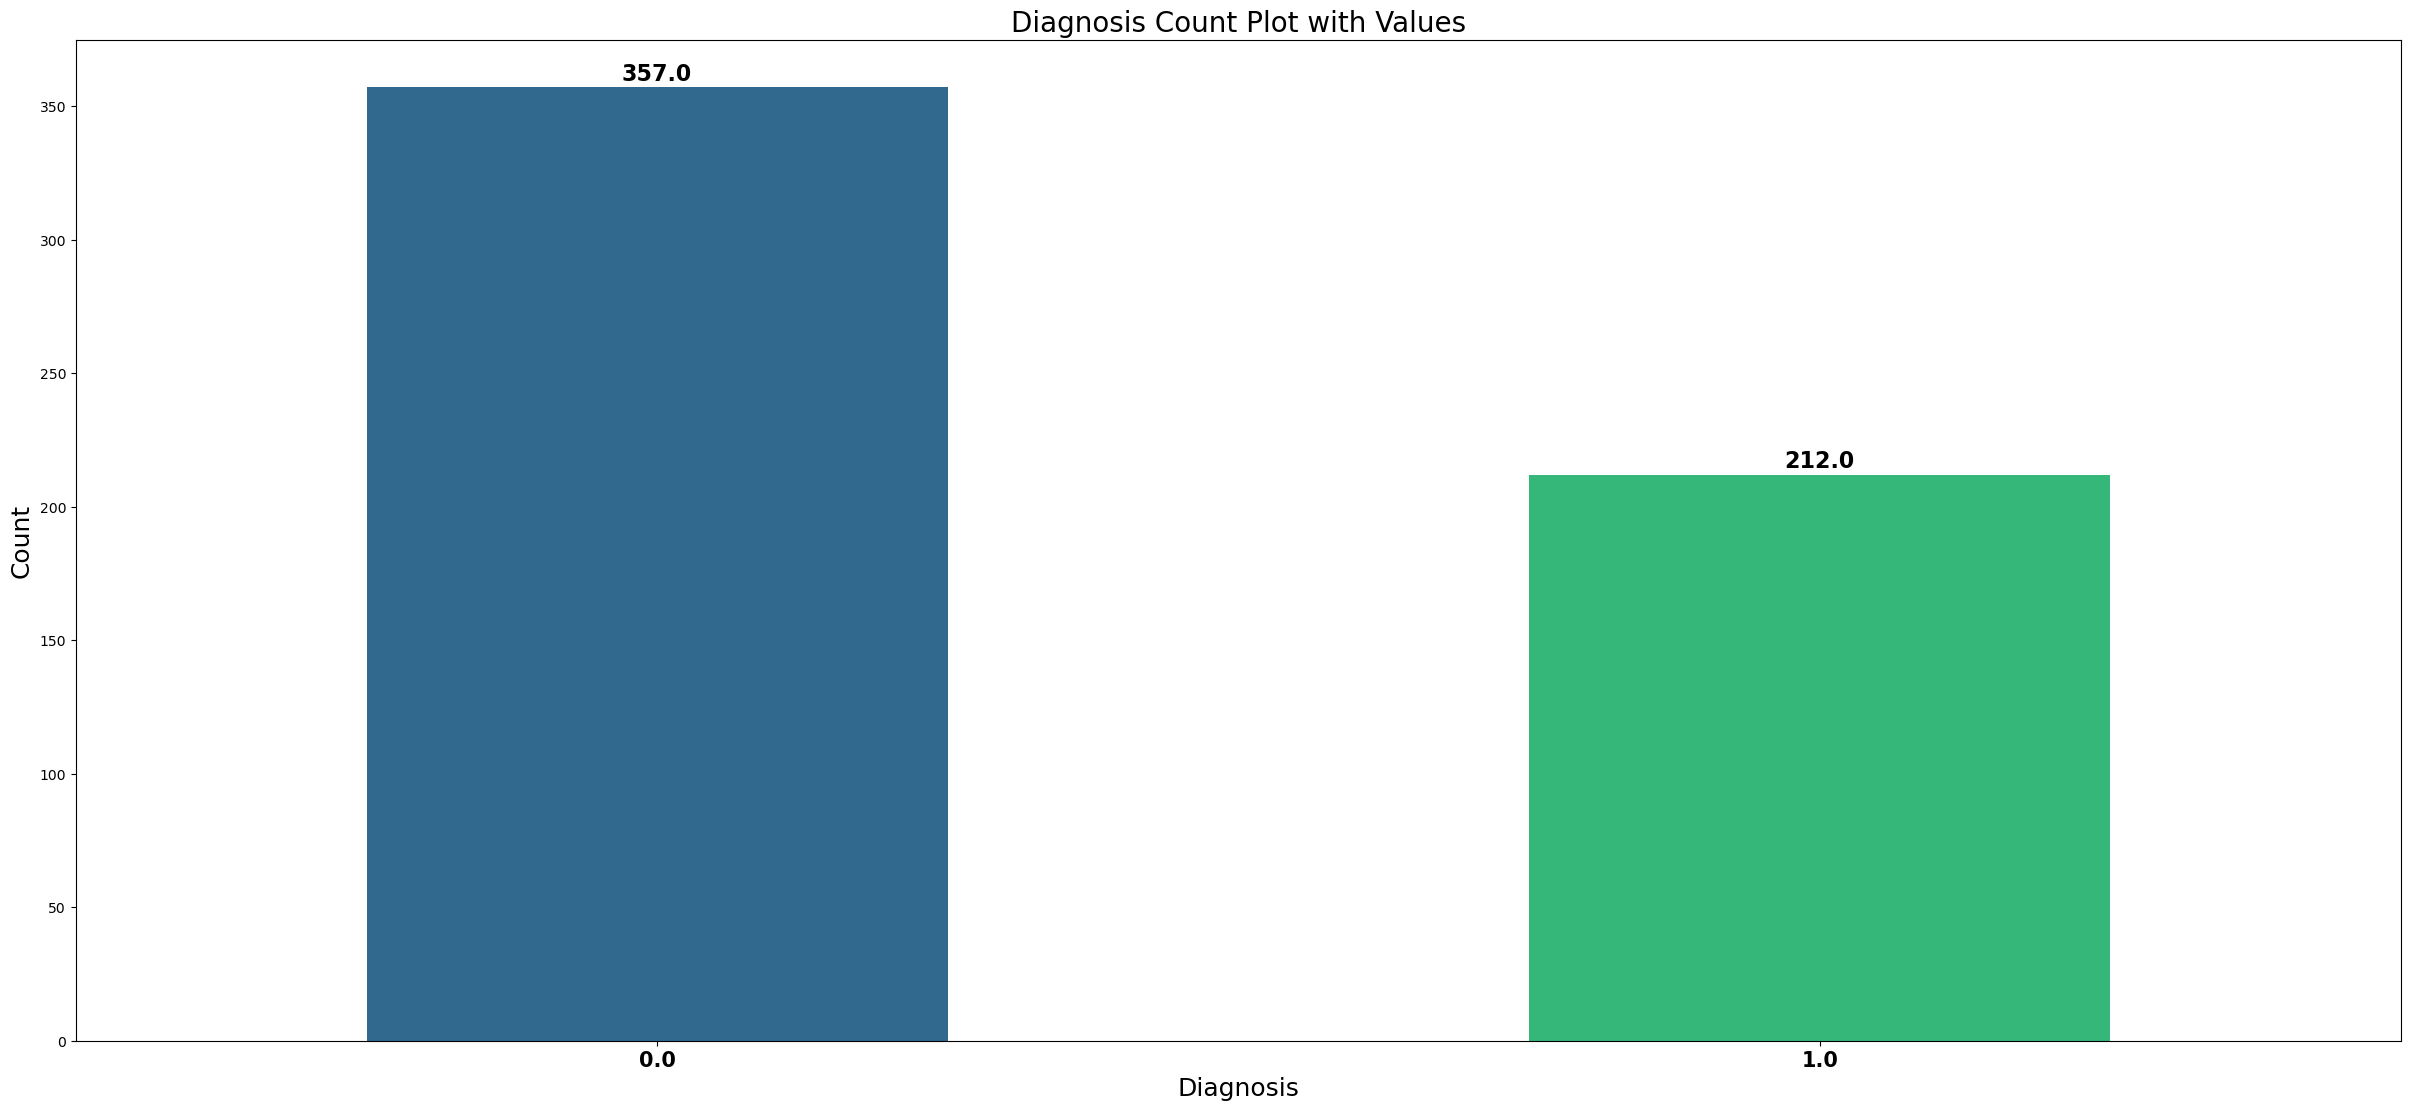

In [16]:
#Countplot;
plt.figure(figsize=(30,13))
ax=sns.countplot(x='diagnosis',data=df,palette='viridis',saturation=1,width=0.5)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15,fontweight='bold')
ax.set_xlabel('Diagnosis', fontsize=18 )
ax.set_ylabel('Count', fontsize=18 )
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=16, fontweight='bold',color='black')
plt.title('Diagnosis Count Plot with Values',fontsize=20)
plt.show()                

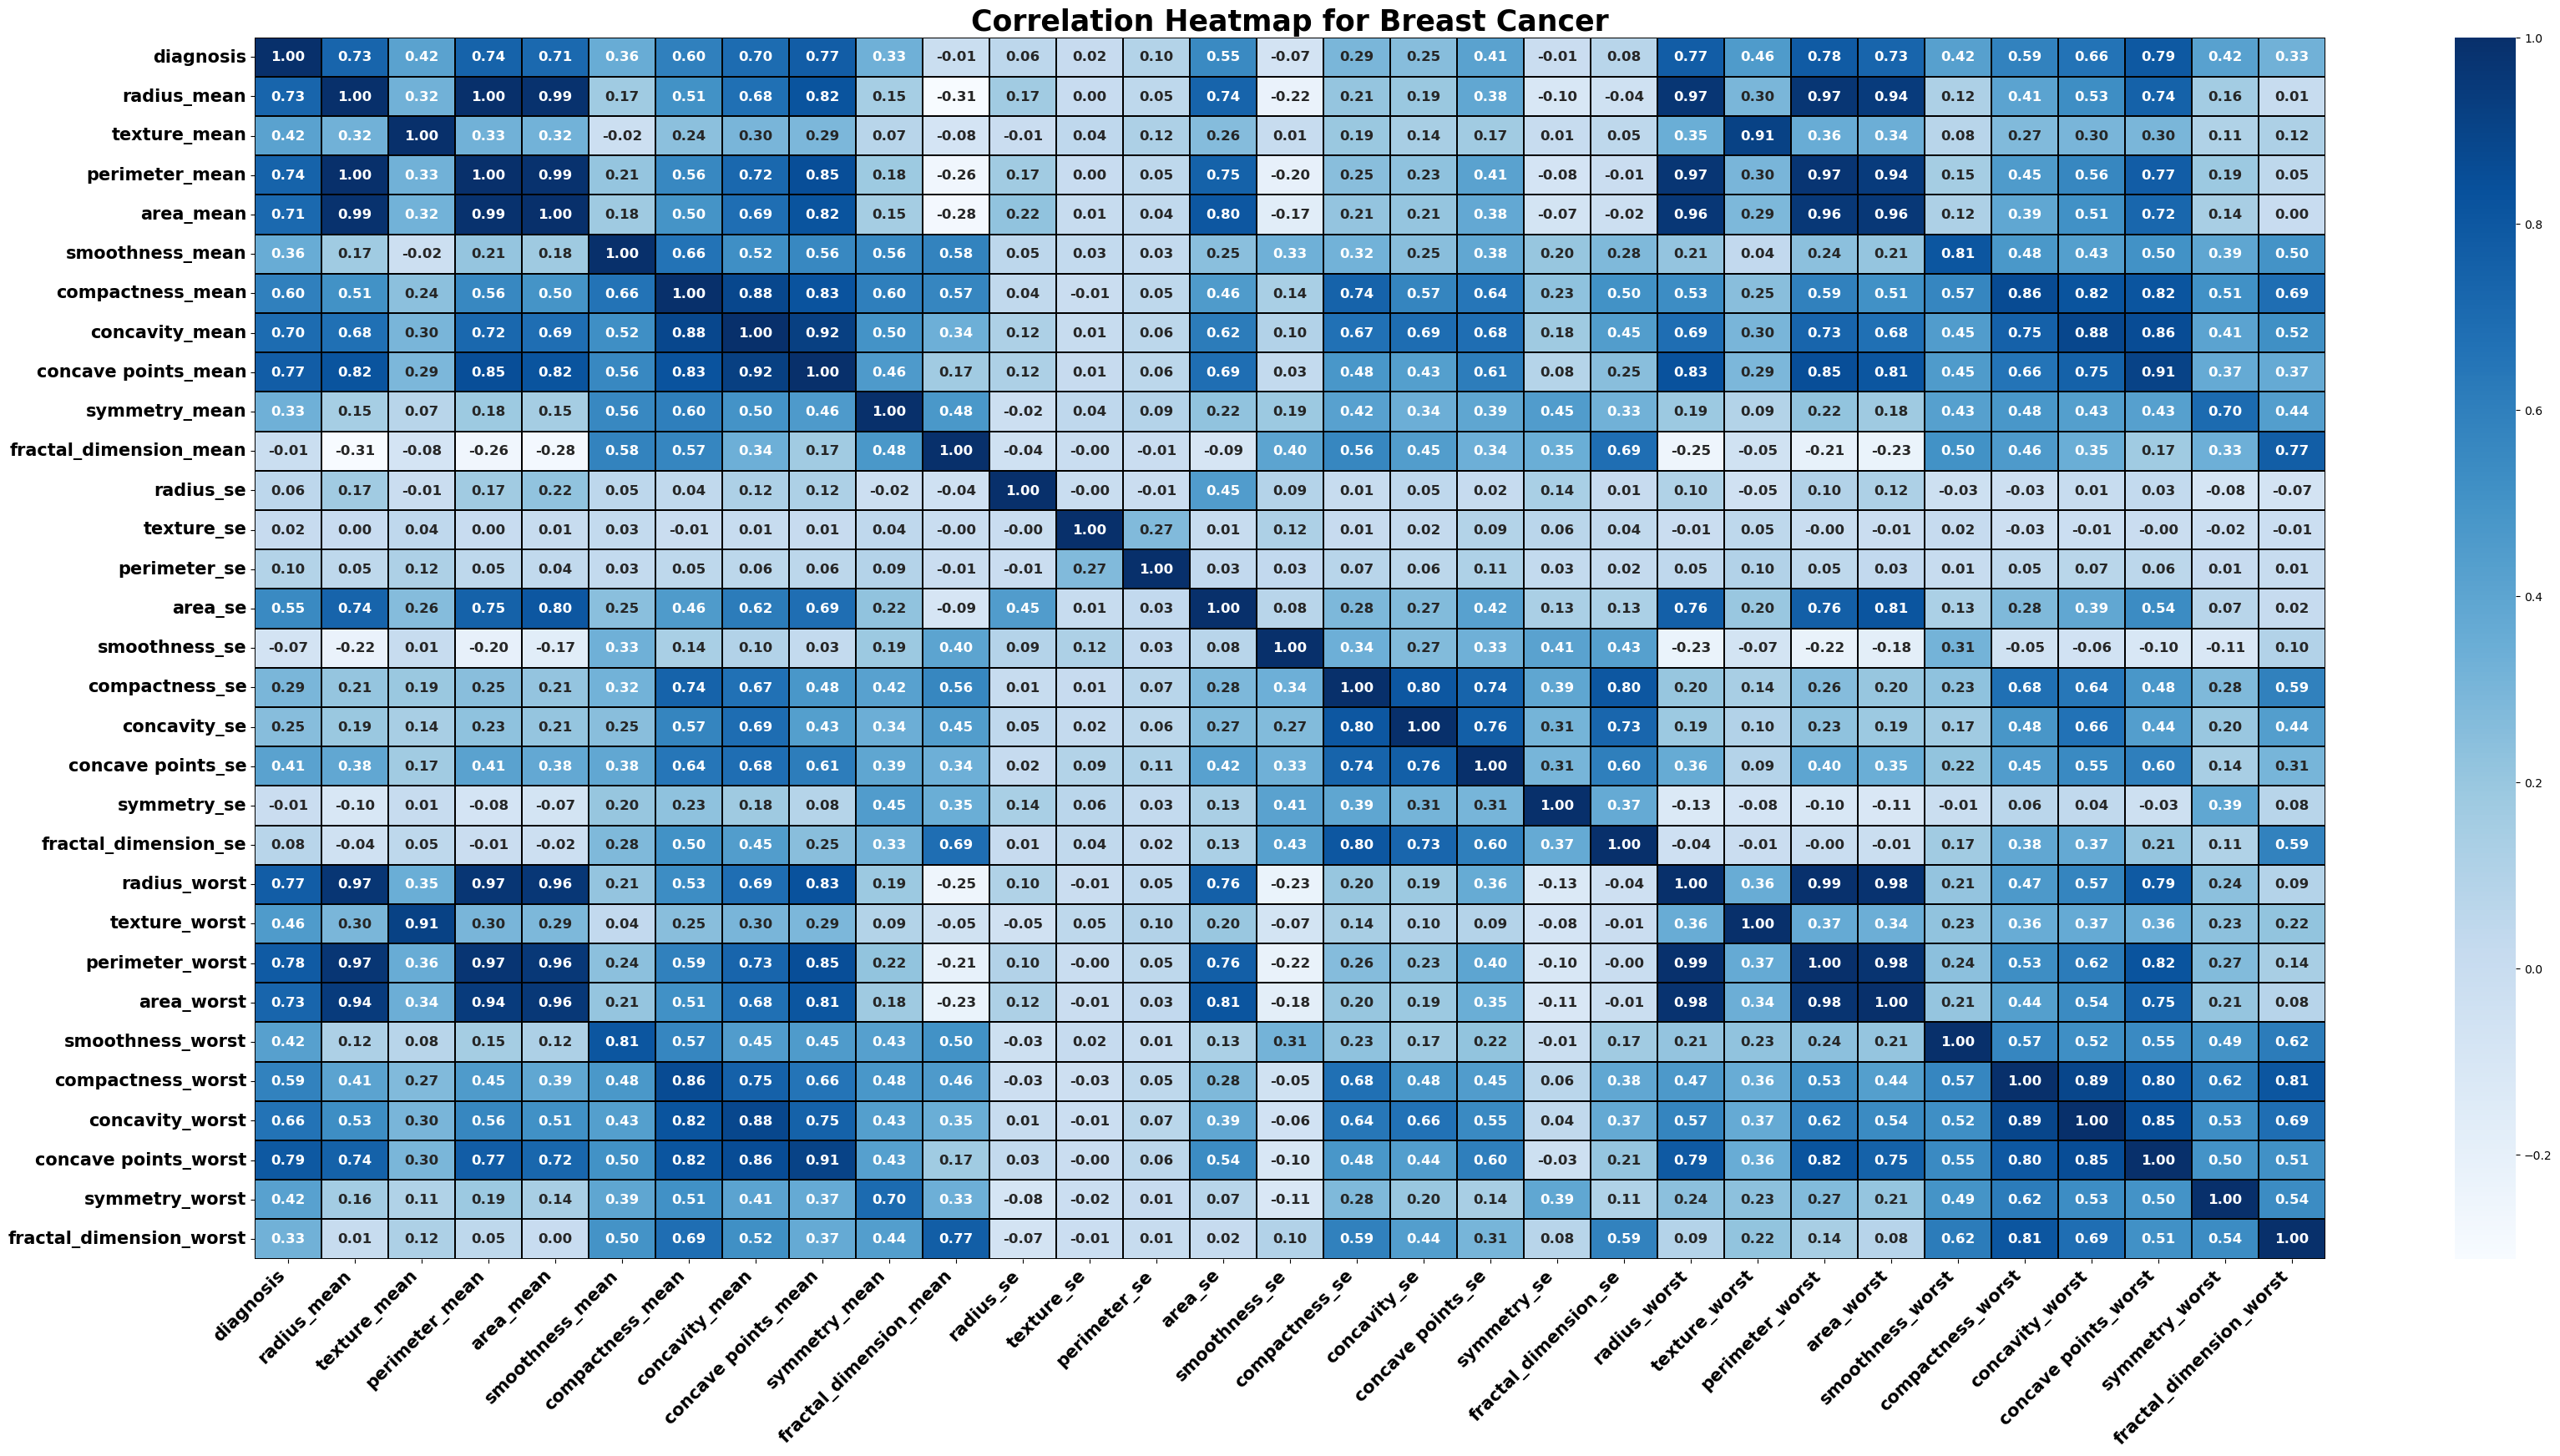

In [17]:
# Heatmap of data
plt.figure(figsize=(40,19))
ax=sns.heatmap(df.corr(), annot=True,fmt='.2f',linewidths=0.3,linecolor='black', cmap="Blues")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right',fontsize=15,fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15,fontweight='bold')

# Annotasyon (sayı) değerlerinin özelleştirilmesi
for text in ax.texts:
    text.set_size(12)
    text.set_weight('bold')
plt.title('Correlation Heatmap for Breast Cancer',fontsize=25,fontweight='bold');

In [18]:
# Getting Se Columns with diagnosis = Yarıçap Standart Sapması
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

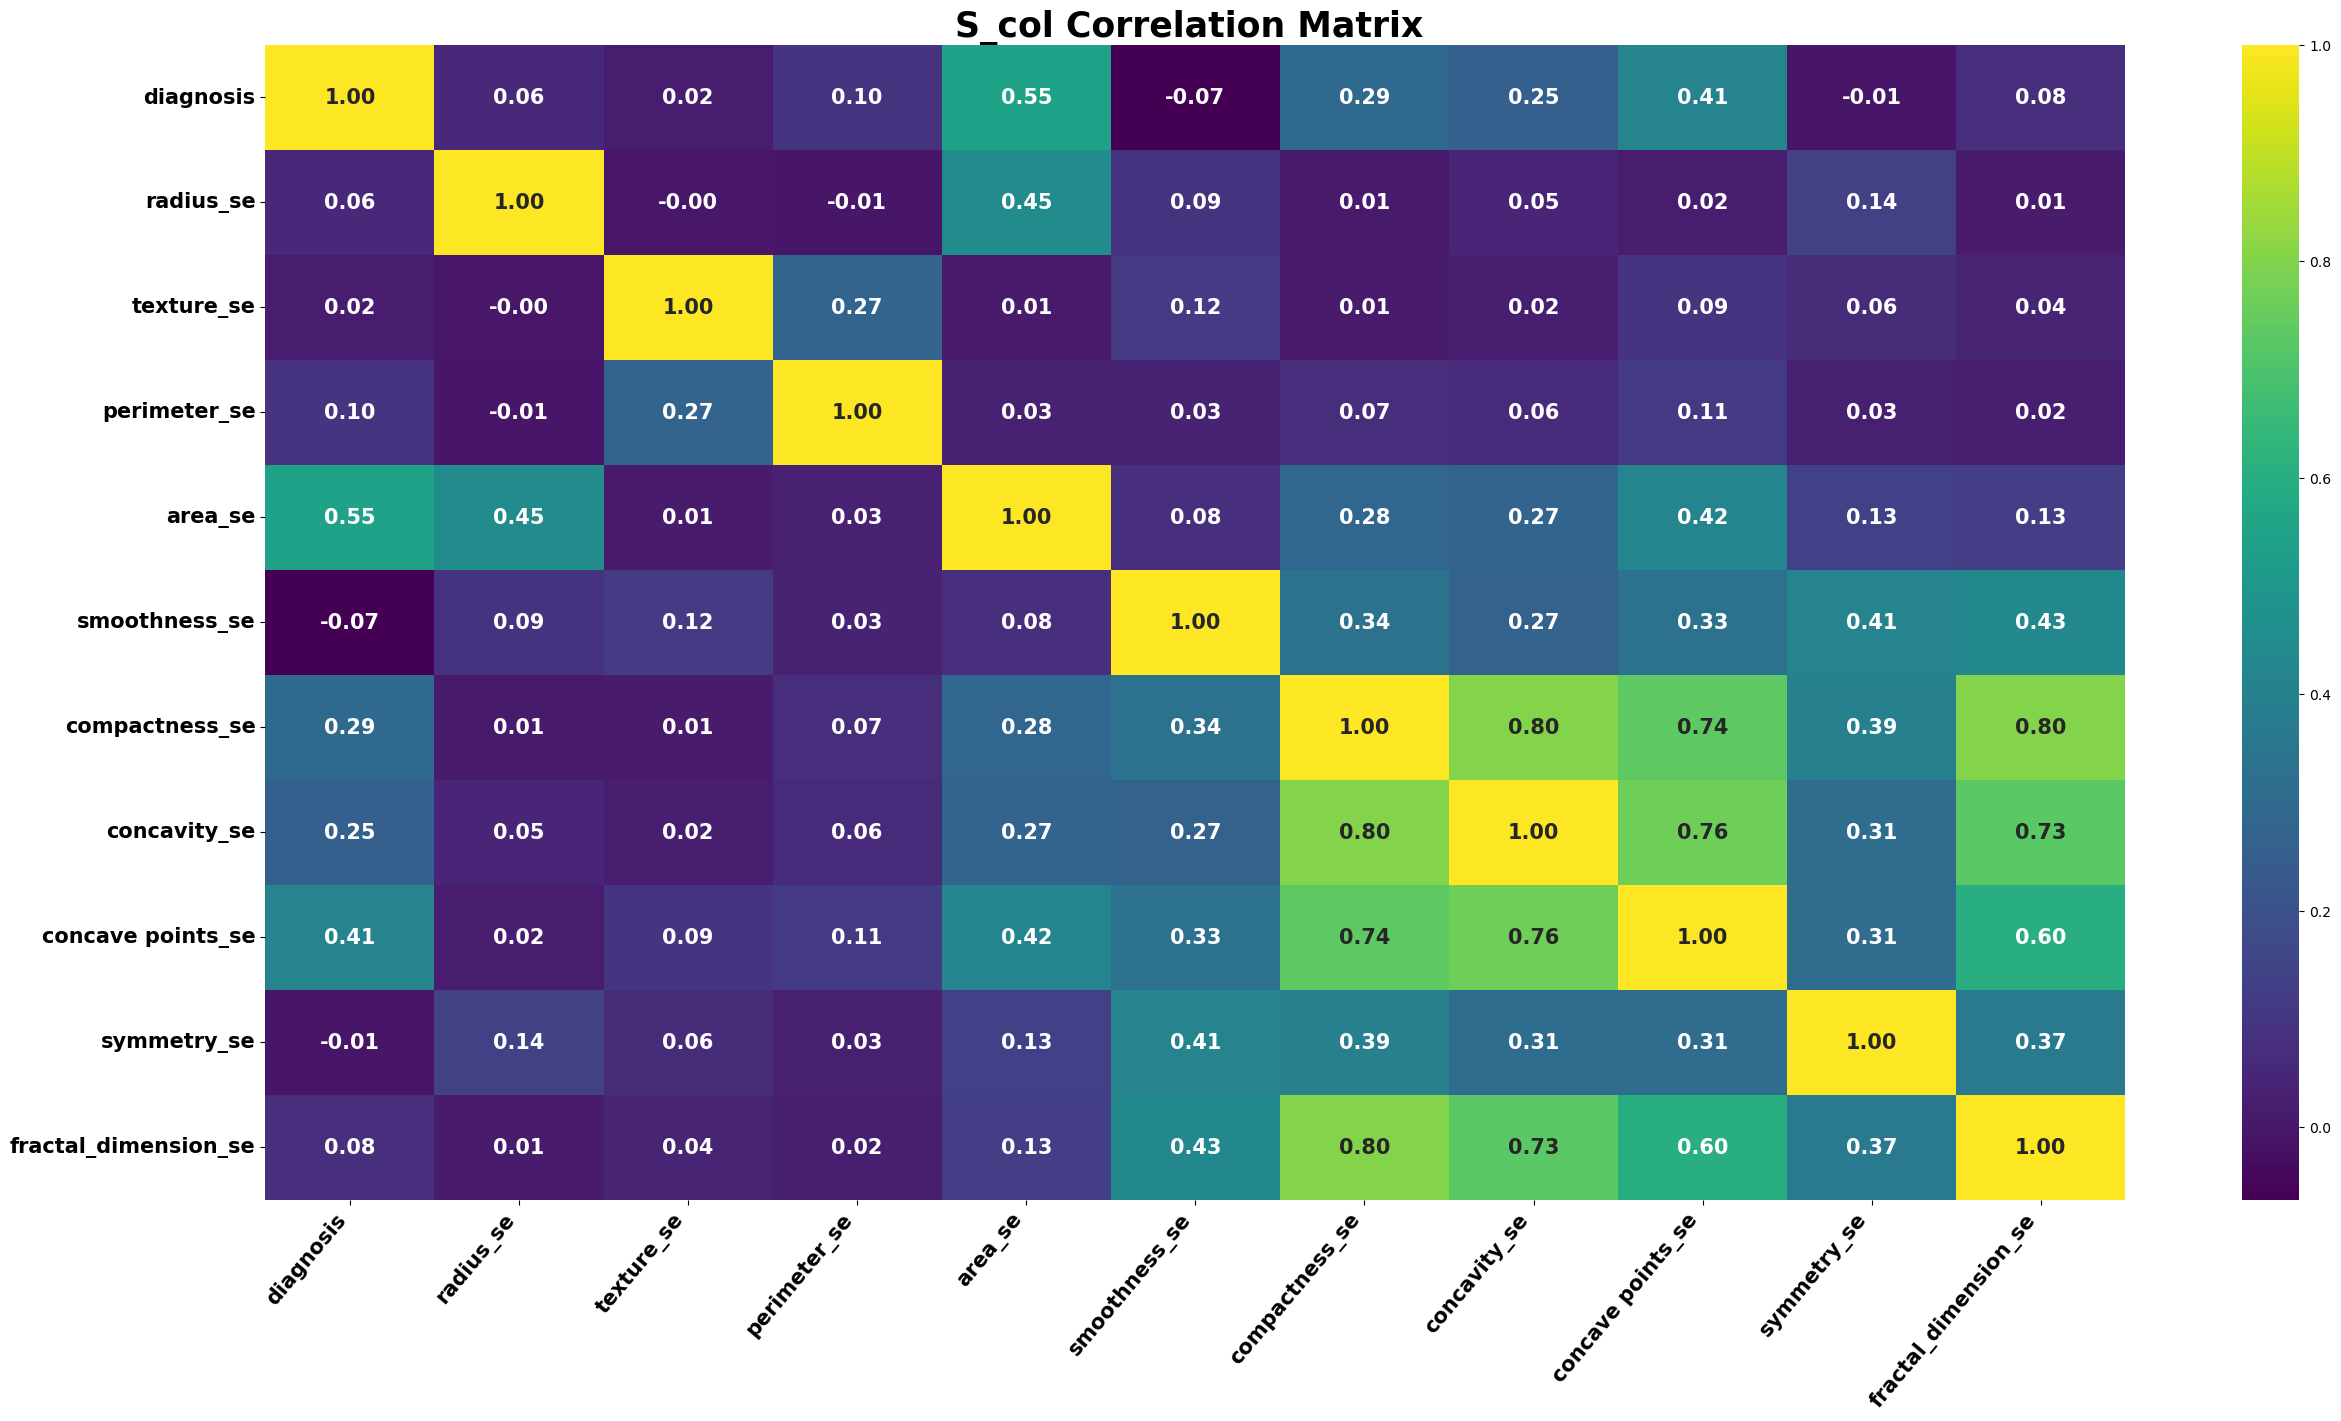

In [19]:
# Heatmap for Se Columns 
plt.figure(figsize=(30, 15))
ax=sns.heatmap(df[s_col].corr(), annot=True, cmap='viridis', fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right',fontsize=15,fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15,fontweight='bold')

# Annotasyon (sayı) değerlerinin özelleştirilmesi
for text in ax.texts:
    text.set_size(15)
    text.set_weight('bold')
plt.title('S_col Correlation Matrix ',fontsize=25,fontweight='bold');

In [20]:
# Getting Mean Columns with diagnosis = Ortalama Yarıçap
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

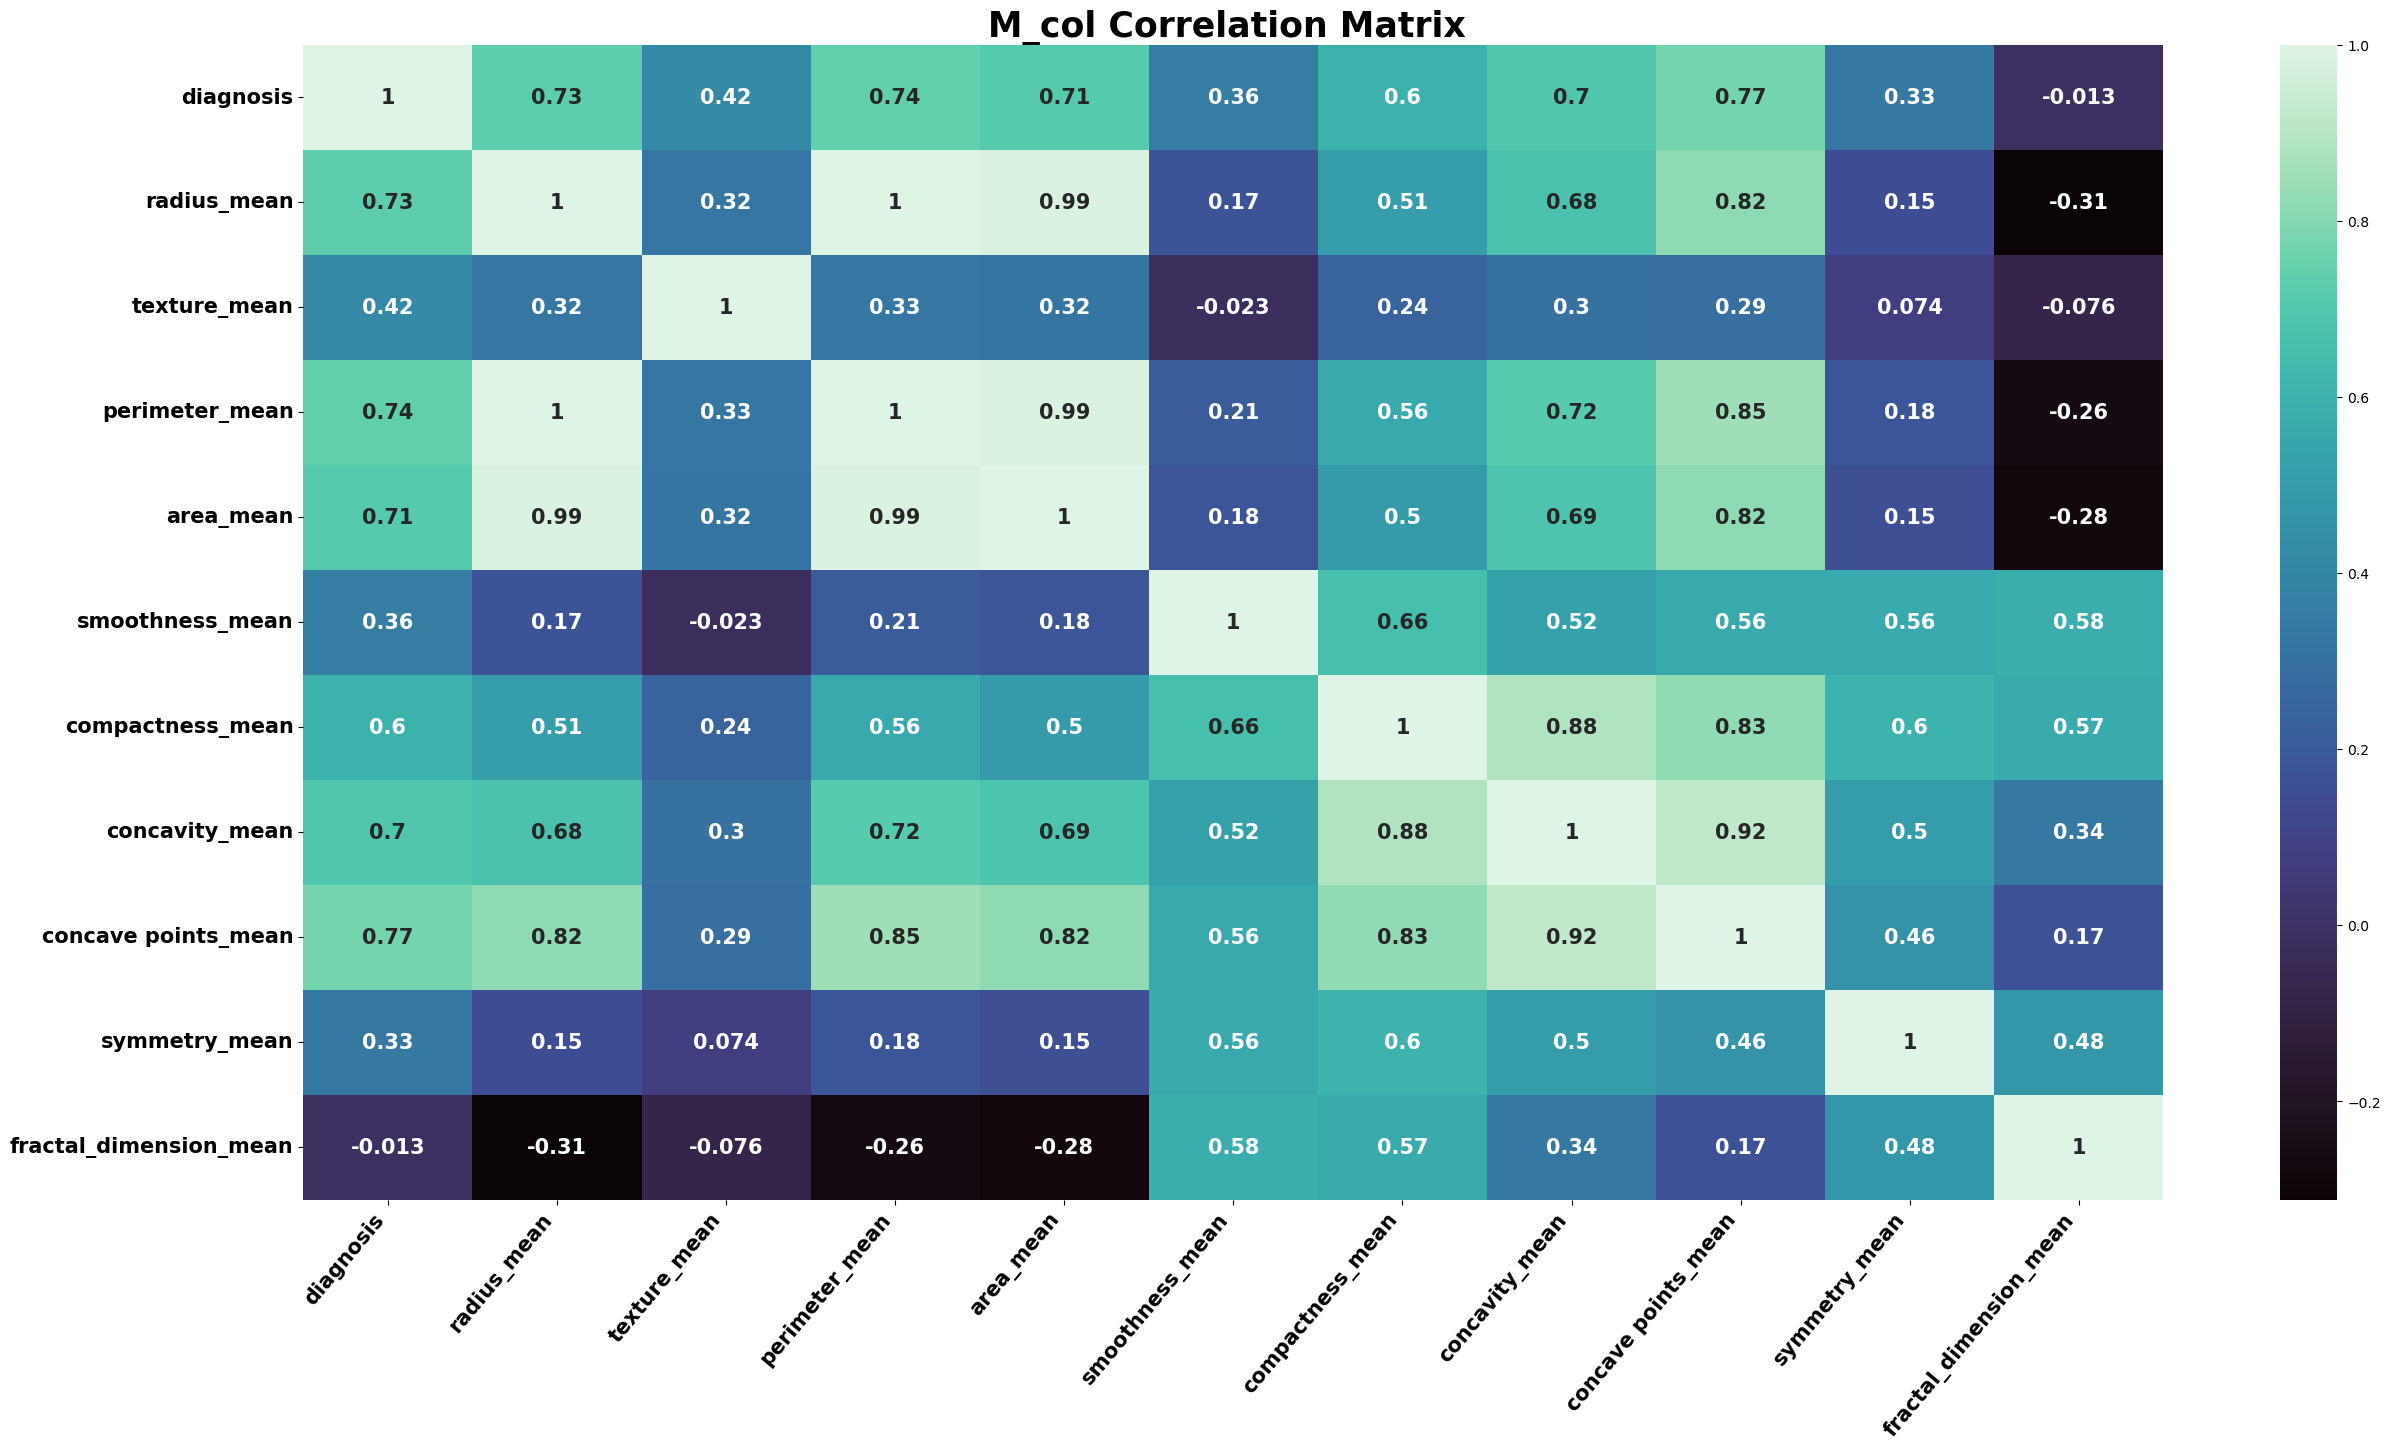

In [21]:
# Heatmap for Mean Columns 
plt.figure(figsize=(30, 15))
ax=sns.heatmap(df[m_col].corr(), annot=True, cmap='mako', fmt=".2g")
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right',fontsize=15,fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15,fontweight='bold')
# Annotasyon (sayı) değerlerinin özelleştirilmesi
for text in ax.texts:
    text.set_size(15)
    text.set_weight('bold')
plt.title('M_col Correlation Matrix ',fontsize=25,fontweight='bold');

In [22]:
# Getting Worst column with diagnosis = En Kötü Yarıçap
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

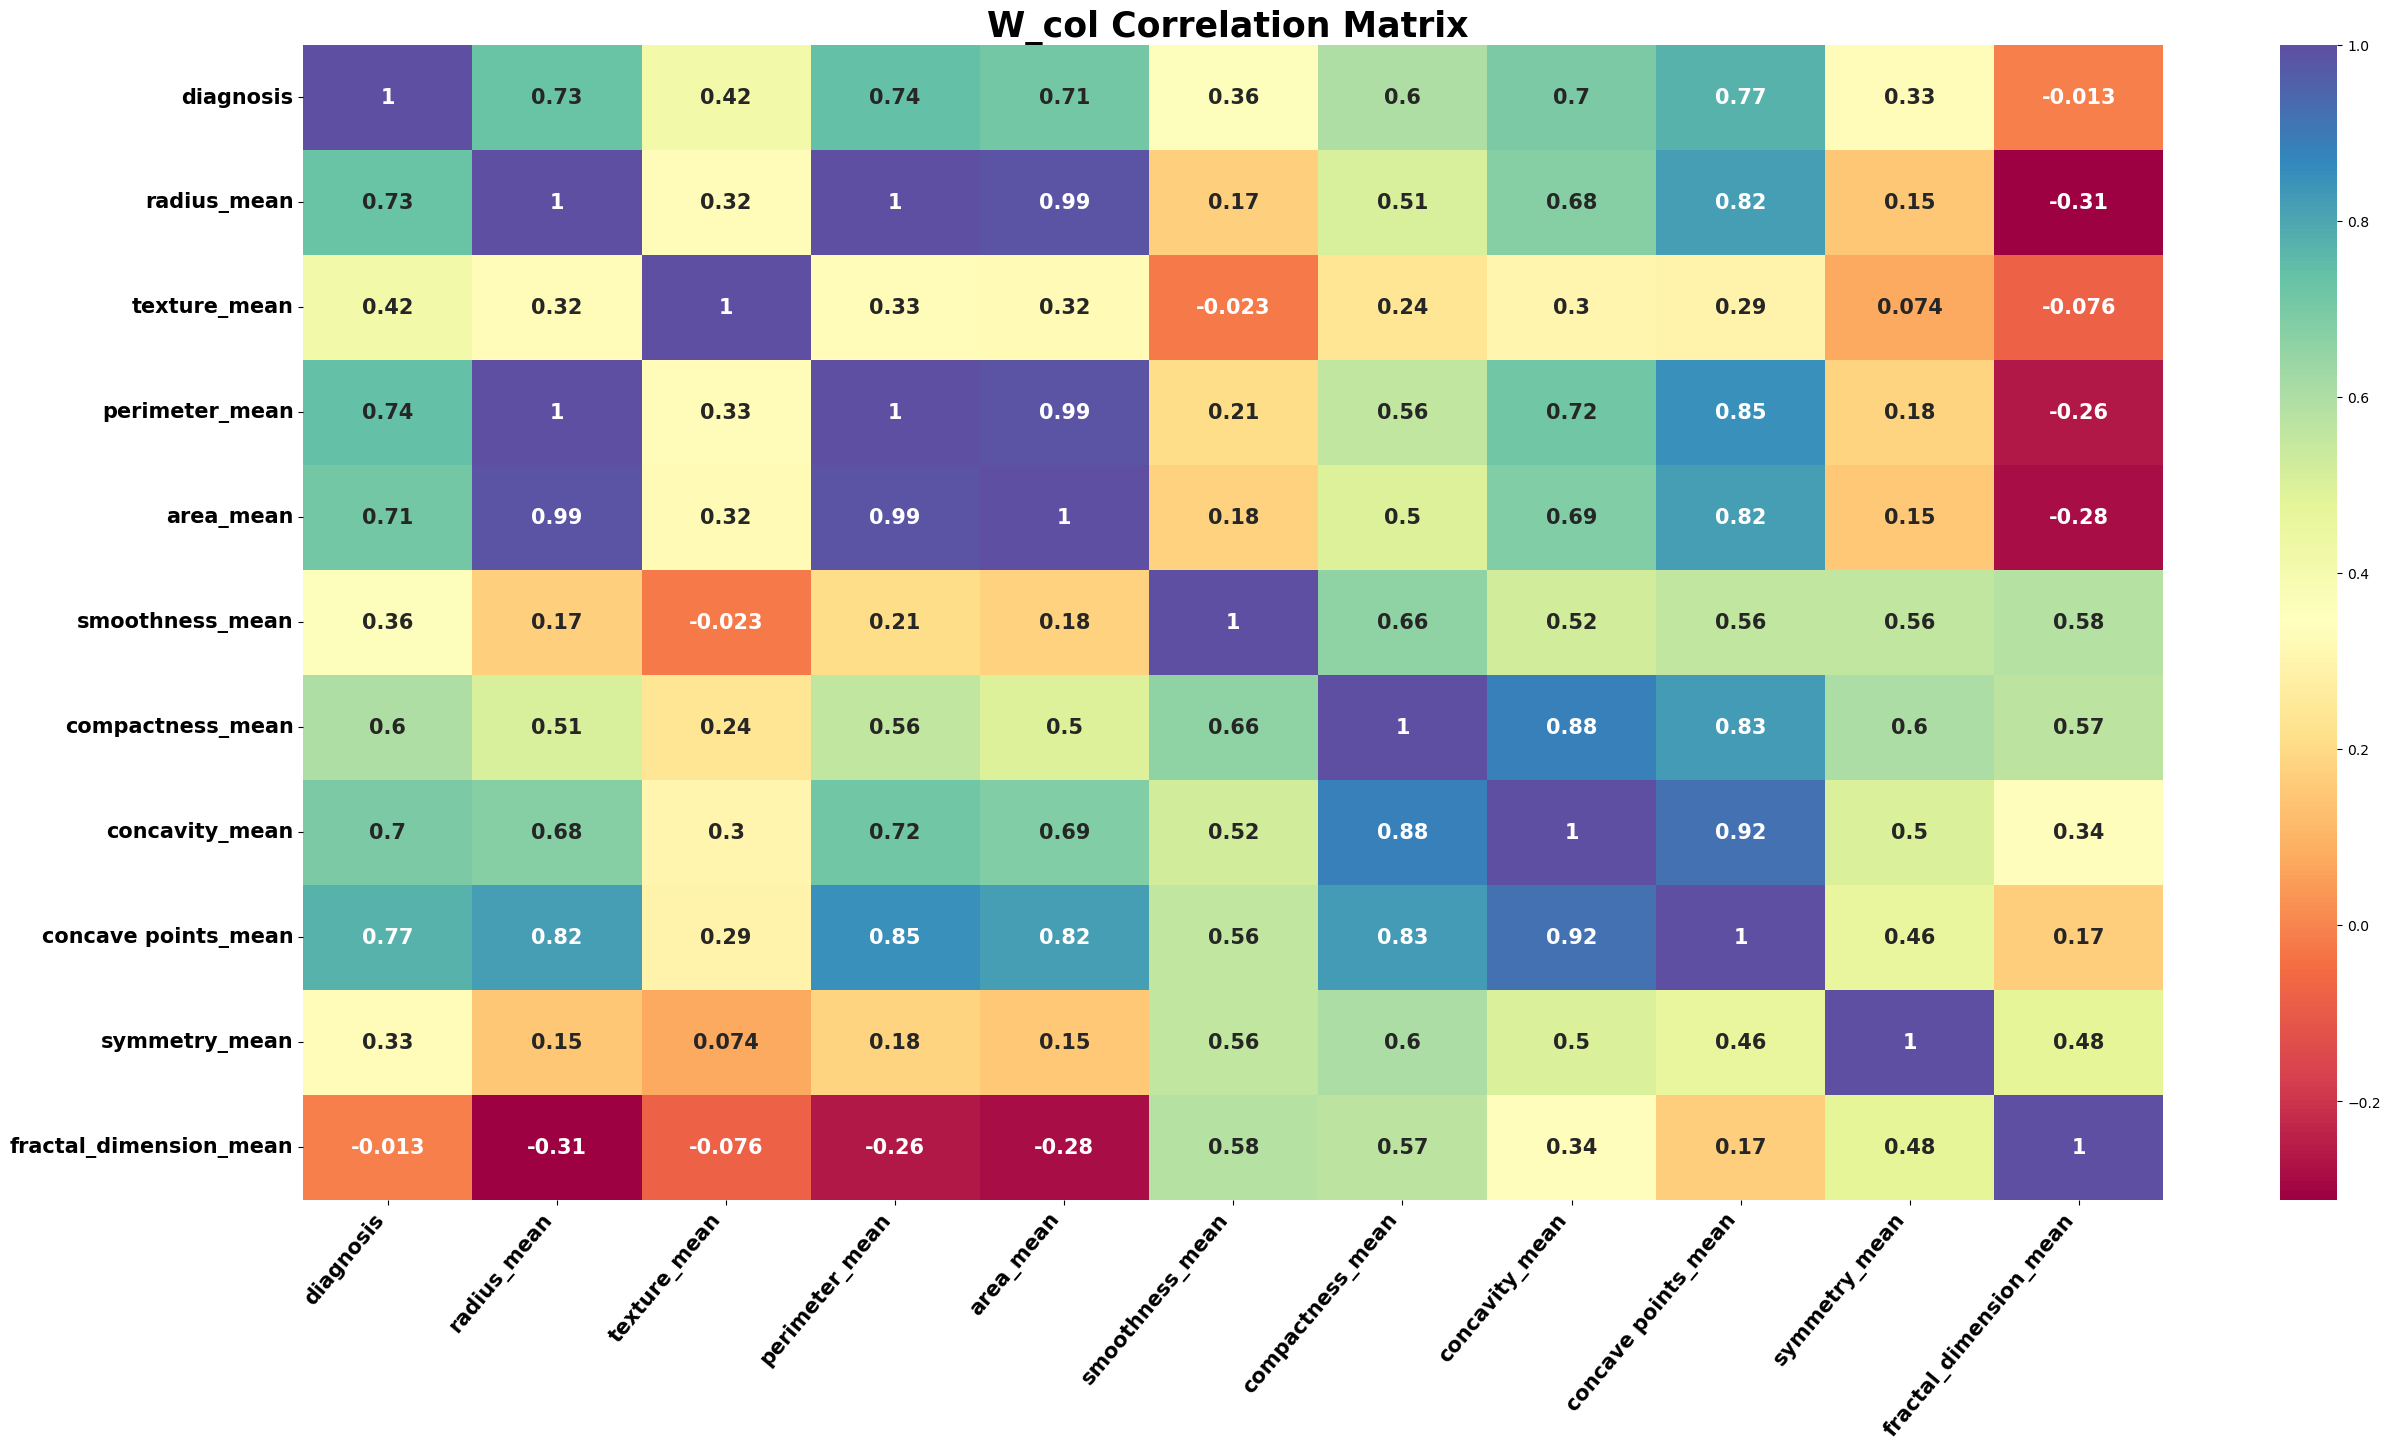

In [23]:
# Heatmap for Worst Columns;
plt.figure(figsize=(30, 15))
ax=sns.heatmap(df[m_col].corr(), annot=True, cmap='Spectral', fmt=".2g")
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right',fontsize=15,fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15,fontweight='bold')

# Annotasyon (sayı) değerlerinin özelleştirilmesi
for text in ax.texts:
    text.set_size(15)
    text.set_weight('bold') 
      
plt.title('W_col Correlation Matrix ',fontsize=25,fontweight='bold');

# Splitting the data into train and test;

In [24]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print('Shape of training set:', X_train.shape)
print('Shape of testing set:', X_test.shape)

Shape of training set: (455, 30)
Shape of testing set: (114, 30)


In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [27]:
### I have tried my best to explain the code very clearly. In this notebook, 
### I will be using 6 classification models;
### Logistic Regression, RandomForestsClassifier, KNeighborsClassifier,XGBClassifier, SupportVectorClassifier (SVC) and MLPClassifier.

## Sınıflandırma modelleri => Classification models;

## LOGISTIC REGRESSION;

In [28]:
log=LogisticRegression()
log_params={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag','newton-cholesky'],
           'penalty':['none', 'l1', 'l2','elasticnet'],
           'C':[0.001, 0.01, 0.1, 1, 10]}

In [29]:
log_cv_model=GridSearchCV(log,log_params,cv=10,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)

In [30]:
log_cv_model.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [31]:
log_model=LogisticRegression(C=0.1, penalty='l2',solver='liblinear')
log_tuned=log_model.fit(X_train,y_train)
#test failure of our final model:
y_pred_log=log_model.predict(X_test)

In [32]:
#Final Model
accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log  = confusion_matrix(y_test, y_pred_log)
class_repot_log =classification_report(y_test, y_pred_log)
mse_log =np.sqrt(mean_squared_error(y_test,y_pred_log))

In [33]:
print("Accuracy:", accuracy_log)
print("Confusion matrix: \n", conf_matrix_log)
print("Mean Squared Error:", mse_log)
print("classification_report: \n", class_repot_log)

Accuracy: 0.9824561403508771
Confusion matrix: 
 [[71  0]
 [ 2 41]]
Mean Squared Error: 0.13245323570650439
classification_report: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        71
         1.0       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Roc Auc Score LogisticRegression;

In [34]:
log_tuned.predict_proba(X_test)
y_probsl=log_tuned.predict_proba(X_test)[:,1]
roc_log=roc_auc_score(y_test,y_probsl)# roc_auc_score = Probability of being correct according to LogisticRegression
roc_log

0.9983622666229938

# Random Forest Classifier;

In [35]:
rf = RandomForestClassifier()
rf_params={'max_depth':[2,5,8,10],
          'max_features':['sqrt', 'log2'],
          'n_estimators':[100,200,300],
          'min_samples_split':[2,10,80,100]}

In [36]:
rf_cv_model=GridSearchCV(rf,rf_params,cv=10,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)

In [37]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 300}

In [38]:
rf_model=RandomForestClassifier(max_depth=8,max_features='log2',min_samples_split=2,max_samples=0.1,criterion='entropy',
                                n_estimators=300)

In [39]:
rf_tuned=rf_model.fit(X_train,y_train)
#test failure of our final model:
y_pred_rf=rf_tuned.predict(X_test)

In [40]:
#Final Model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_repot_rf=classification_report(y_test, y_pred_rf)
mse_rf=np.sqrt(mean_squared_error(y_test,y_pred_rf))#

In [41]:
print("Accuracy:", accuracy_rf)
print("Confusion matrix: \n", conf_matrix_rf)
print("Mean Squared Error:", mse_rf)
print("classification_report: \n", class_repot_rf)

Accuracy: 0.956140350877193
Confusion matrix: 
 [[71  0]
 [ 5 38]]
Mean Squared Error: 0.20942695414584775
classification_report: 
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        71
         1.0       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



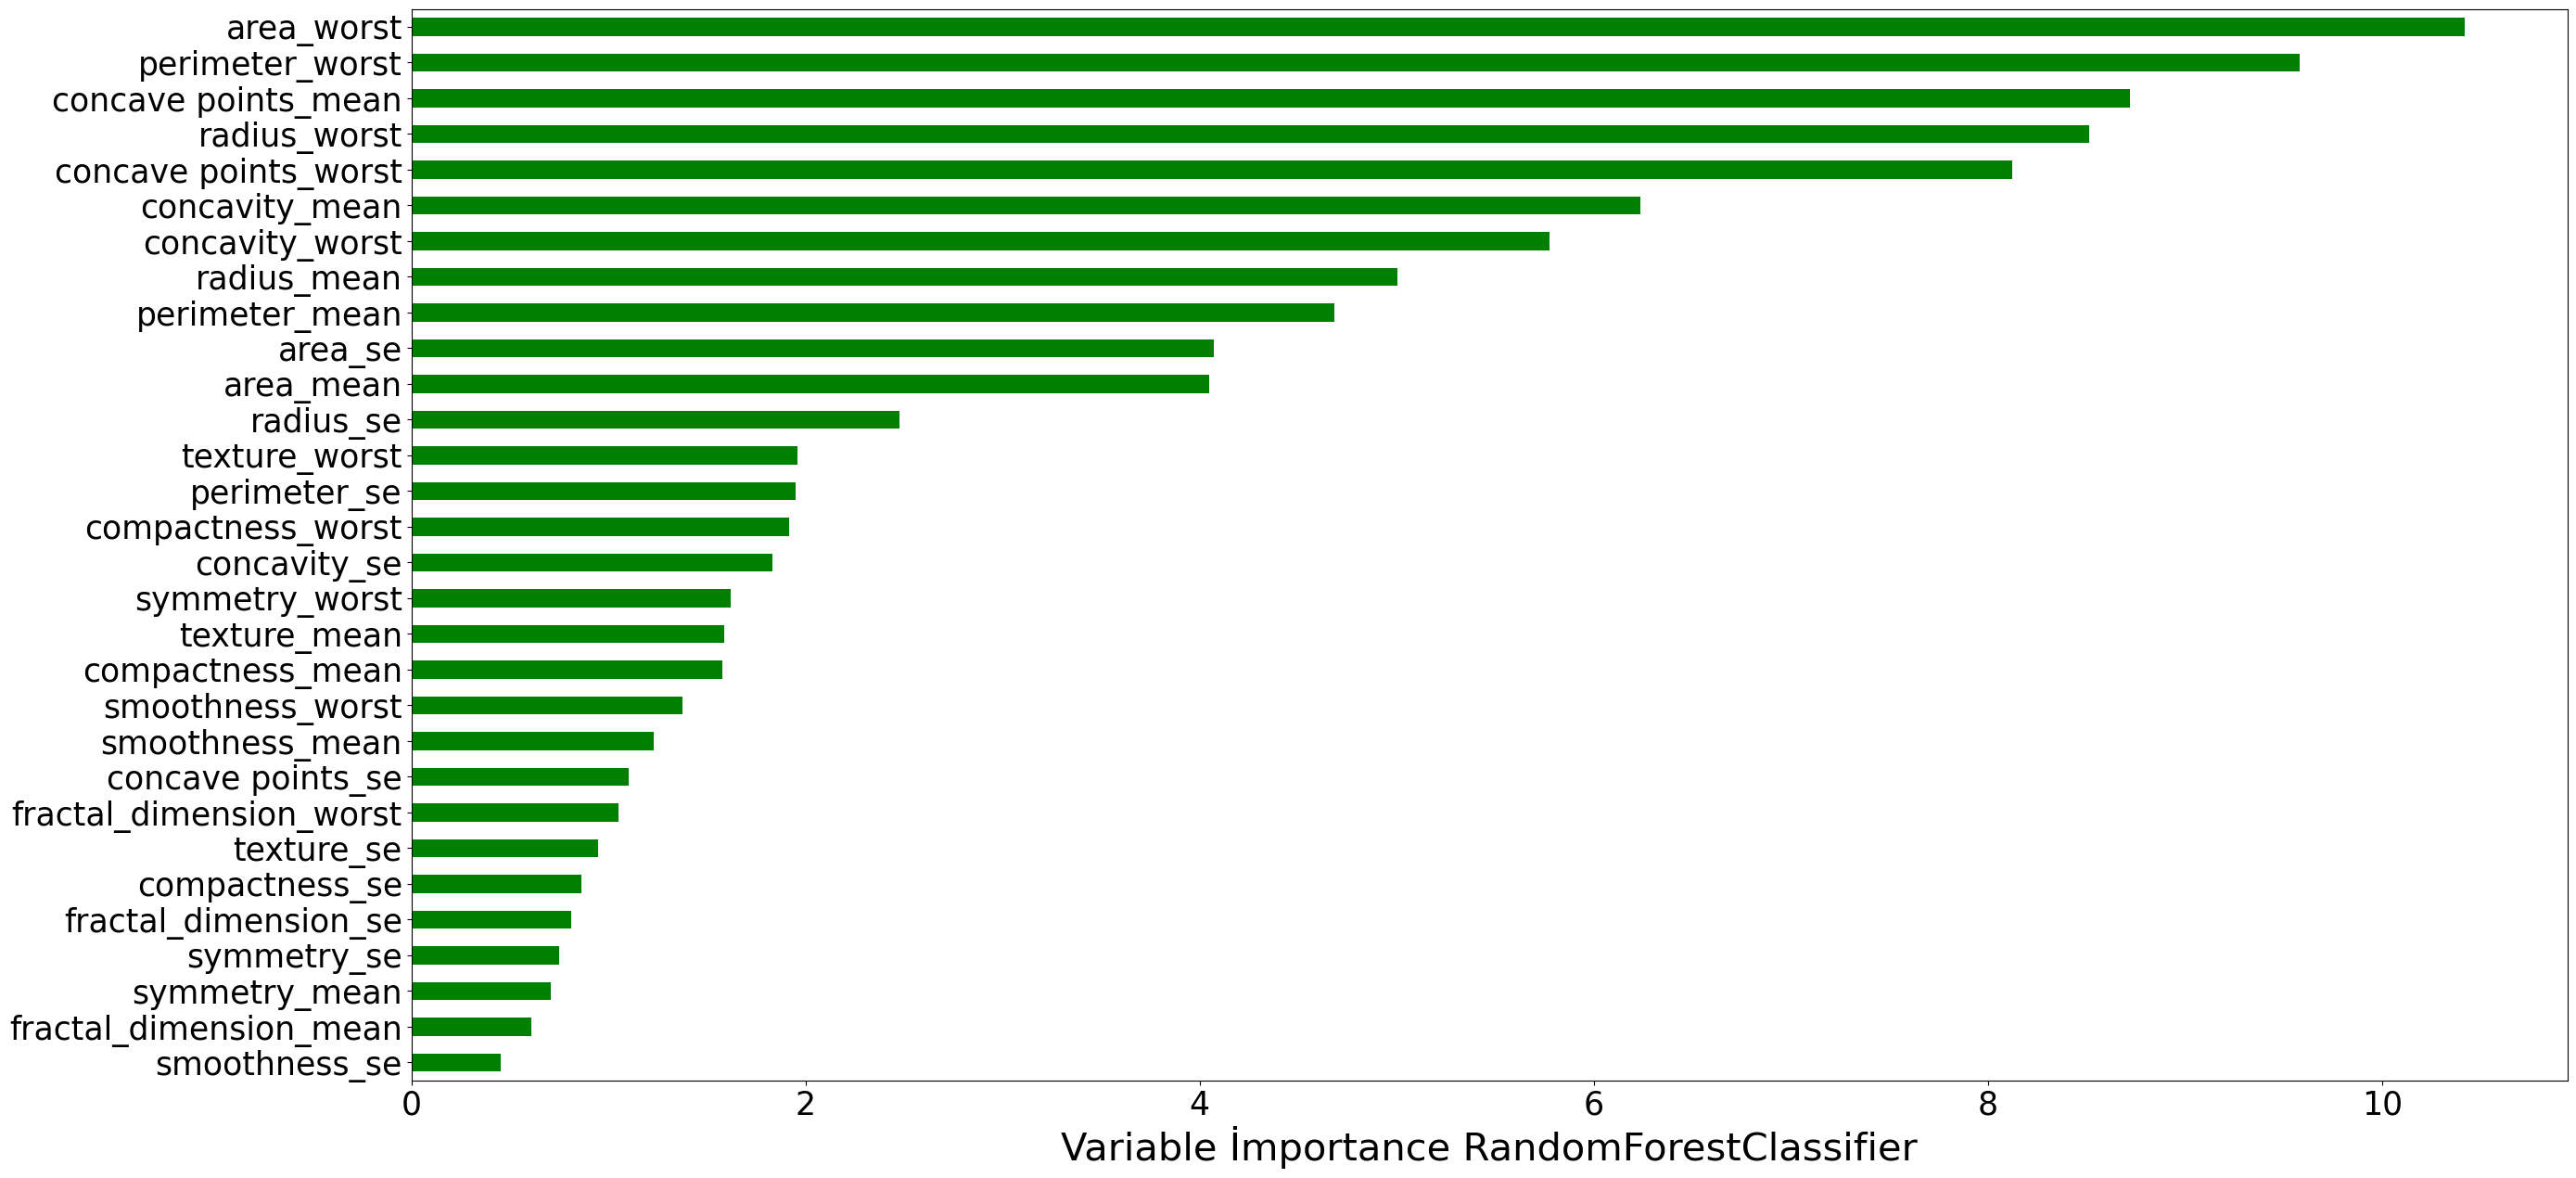

In [42]:
#Significance of variables according to RandomForestClassifier;
X_col=pd.DataFrame(X_train,columns=X.columns)
importance = pd.DataFrame({'İmportance':rf_tuned.feature_importances_*100},
                         index=X_col.columns)
importance.sort_values(by='İmportance',
                      axis=0,
                      ascending=True).plot(kind='barh',
                                          color='g',figsize=(30,15),fontsize=25)

plt.xlabel('Variable İmportance RandomForestClassifier',fontsize=30)
plt.gca().legend_=None

## Roc Auc Score RandomForestClassifier;

In [43]:
rf_tuned.predict_proba(X_test)
y_probsf=rf_tuned.predict_proba(X_test)[:,1]#
roc_rf=roc_auc_score(y_test,y_probsf)# roc_auc_score  = Probability of being correct according to RandomForestClassifier;
roc_rf

0.99737962659679

# KNeighborsClassifier;

In [44]:
knn=KNeighborsClassifier()
knn_params={'metric':['euclidean', 'manhattan', 'minkowski'],
           'weights':['uniform', 'distance'],
           'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
           'n_neighbors':[3,4,5,6,7,8,9,14]}

In [45]:
knn_cv_model=GridSearchCV(knn,knn_params,cv=10,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)

In [46]:
knn_cv_model.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 6,
 'weights': 'uniform'}

In [47]:
knn_model=KNeighborsClassifier(algorithm='auto',metric='manhattan',weights='uniform',n_neighbors=6)

In [48]:
knn_tuned=knn_model.fit(X_train,y_train)
#test failure of our final model
y_pred_knn=knn_tuned.predict(X_test)

In [49]:
#Final Model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_repot_knn=classification_report(y_test, y_pred_knn)
mse_knn=np.sqrt(mean_squared_error(y_test,y_pred_knn))

In [50]:
print("Accuracy:", accuracy_knn)
print("Confusion matrix: \n", conf_matrix_knn)
print("Mean Squared Error:", mse_knn)
print("classification_report: \n", class_repot_knn)

Accuracy: 0.956140350877193
Confusion matrix: 
 [[69  2]
 [ 3 40]]
Mean Squared Error: 0.20942695414584775
classification_report: 
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        71
         1.0       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Roc Auc Score KNeighborsClassifier;

In [51]:
knn_tuned.predict_proba(X_test)
y_probsk=knn_tuned.predict_proba(X_test)[:,1]
roc_knn=roc_auc_score(y_test,y_probsk)# roc_auc_score  = Probability of being correct according to KNeighborsClassifier;

# XGBClassifier;

In [52]:
xgb=XGBClassifier()
xgb_params={'learning_rate':[0.1,0.3,0.01,0.5],
           'max_depth':[2,3,4,5,8],
           'n_estimators':[100,150,200],
           'colsample_bytree':[0.4,0.7,1]}

In [54]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.3,
 'max_depth': 4,
 'n_estimators': 150}

In [55]:
xgb_model=XGBClassifier(colsample_bytree=0.4,learning_rate= 0.3,max_depth= 4,n_estimators= 150)

In [56]:
xgb_tuned=xgb_model.fit(X_train,y_train)
#test failure of our final model
y_pred_xgb=xgb_tuned.predict(X_test)

[18:03:02] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [57]:
#Final Model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_repot_xgb=classification_report(y_test, y_pred_xgb)
mse_xgb=np.sqrt(mean_squared_error(y_test,y_pred_xgb))

In [58]:
print("Accuracy:", accuracy_xgb)
print("Confusion matrix: \n", conf_matrix_xgb)
print("Mean Squared Error:", mse_xgb)
print("classification_report: \n", class_repot_xgb)

Accuracy: 0.9824561403508771
Confusion matrix: 
 [[71  0]
 [ 2 41]]
Mean Squared Error: 0.13245323570650439
classification_report: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        71
         1.0       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



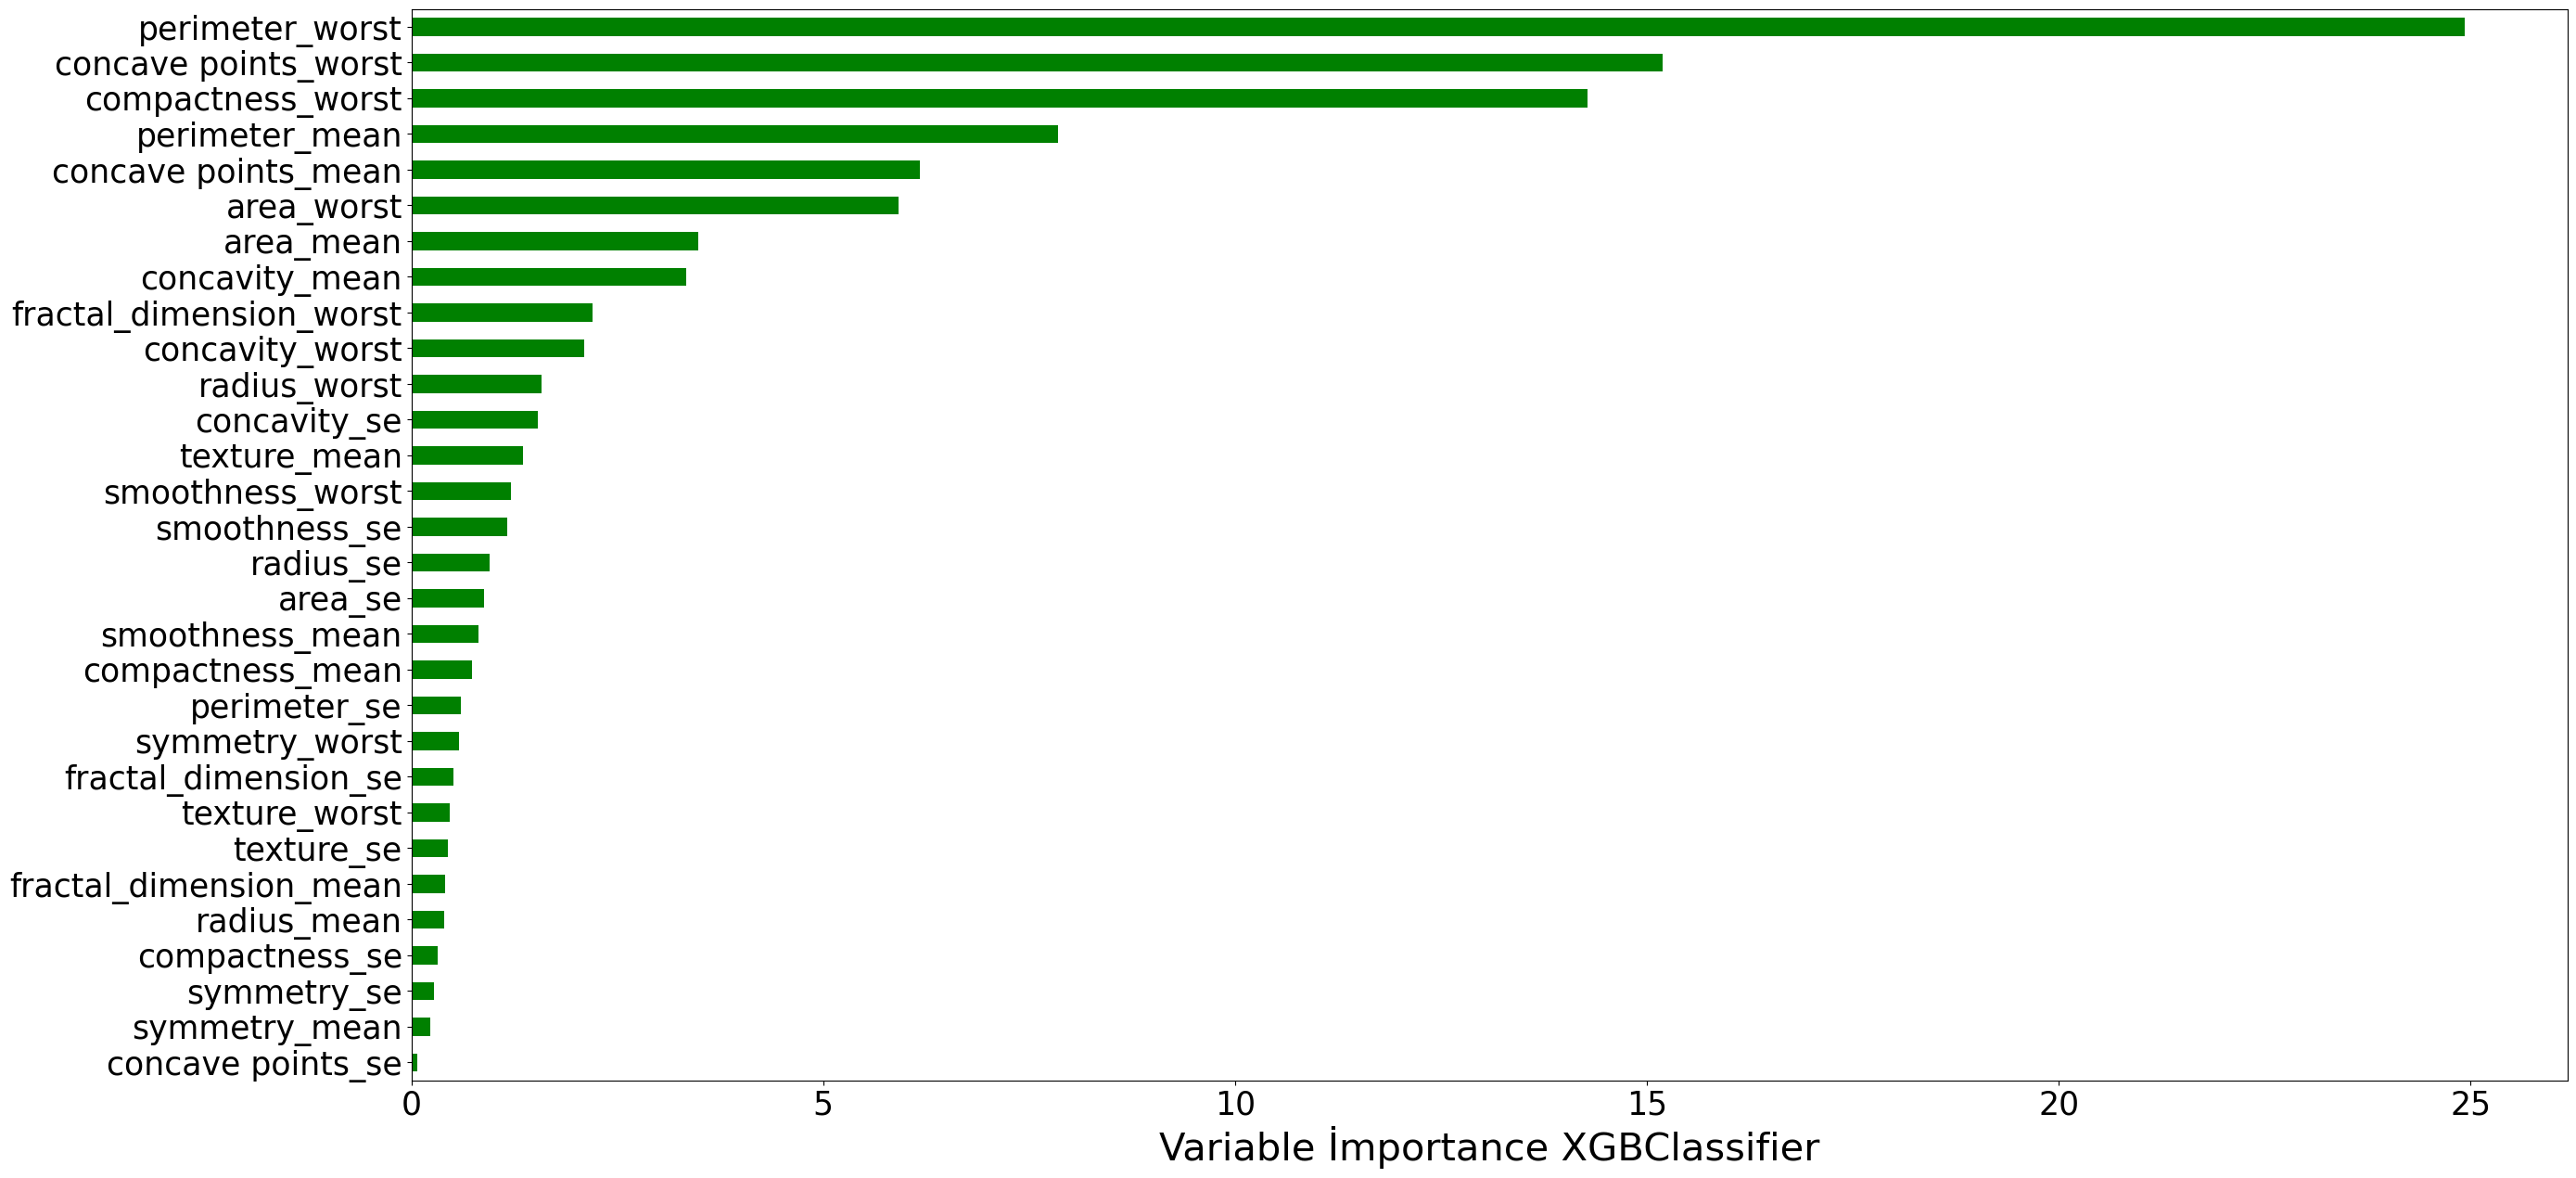

In [59]:
#Significance of variables according to XGBClassifier;
X_col=pd.DataFrame(X_train,columns=X.columns)
importance = pd.DataFrame({'İmportance':xgb_tuned.feature_importances_*100},
                         index=X_col.columns)
importance.sort_values(by='İmportance',
                      axis=0,
                      ascending=True).plot(kind='barh',
                                          color='green',figsize=(30,15),fontsize=25)

plt.xlabel('Variable İmportance XGBClassifier',fontsize=30)
plt.gca().legend_=None

## Roc Auc Score XGBClassifier;

In [60]:
xgb_tuned.predict_proba(X_test)
y_probsx=xgb_tuned.predict_proba(X_test)[:,1]
roc_xgb=roc_auc_score(y_test,y_probsx)# roc_auc_score = Probability of being correct according to  XGBClassifier
roc_xgb

0.9908286930887652

# Support Vector Classifier;

In [61]:
svc=SVC()
svc_params={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
           'C':[0.001,0.1, 0.5, 1.3,10,100],
           'gamma':['scale', 'auto']}

In [62]:
svc_cv_model=GridSearchCV(svc,svc_params, cv=10,scoring='accuracy',n_jobs=-1,verbose=1).fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [63]:
svc_cv_model.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [64]:
svc_model=SVC( C=0.1,gamma='scale',kernel='linear',probability=True)

In [65]:
svc_tuned=svc_model.fit(X_train,y_train)
#test failure of our final model
y_pred_svc=svc_tuned.predict(X_test)

In [66]:
#Final Model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
class_repot_svc=classification_report(y_test, y_pred_svc)
mse_svc=np.sqrt(mean_squared_error(y_test,y_pred_svc))

In [67]:
print("Accuracy:", accuracy_svc)
print("Confusion matrix: \n", conf_matrix_svc)
print("Mean Squared Error:", mse_svc)
print("classification_report: \n", class_repot_svc)

Accuracy: 0.9824561403508771
Confusion matrix: 
 [[71  0]
 [ 2 41]]
Mean Squared Error: 0.13245323570650439
classification_report: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        71
         1.0       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# Roc Auc Score SupportVectorClassifier;

In [68]:
svc_tuned.predict_proba(X_test)
y_probsv=svc_tuned.predict_proba(X_test)[:,1]
roc_svc=roc_auc_score(y_test,y_probsv)# roc_auc_score = Probability of being correct according to  SupportVectorClassifier

# MLPClassifier;

In [69]:
mlp=MLPClassifier()
mlp_params={'hidden_layer_sizes': [(10,30),(20,)],
           'activation': ['tanh', 'relu','logistic'],
           'solver': ['sgd', 'adam','lbfgs'],
           'alpha': [0.0001, 0.05],
           'learning_rate': ['constant','adaptive','invscaling'],
           'max_iter':[75,100,150]}

In [71]:
mlp_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (10, 30),
 'learning_rate': 'invscaling',
 'max_iter': 150,
 'solver': 'adam'}

In [72]:
mlp_model=MLPClassifier(hidden_layer_sizes=(10,30),activation='relu',solver='adam',alpha=0.005,batch_size='auto',learning_rate='invscaling',max_iter=150)

In [73]:
mlp_tuned=mlp_model.fit(X_train,y_train)
#test failure of our final model
y_pred_mlp=mlp_tuned.predict(X_test)

In [74]:
#Final Model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
class_repot_mlp=classification_report(y_test, y_pred_mlp)
mse_mlp=np.sqrt(mean_squared_error(y_test,y_pred_mlp))

In [75]:
print("Accuracy:", accuracy_mlp)
print("Confusion matrix: \n", conf_matrix_mlp)
print("Mean Squared Error:", mse_mlp)
print("classification_report: \n", class_repot_mlp)

Accuracy: 0.9736842105263158
Confusion matrix: 
 [[70  1]
 [ 2 41]]
Mean Squared Error: 0.16222142113076254
classification_report: 
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Roc Auc Score MLPClassifier;

In [76]:
mlp_tuned.predict_proba(X_test)
y_probsp=mlp_tuned.predict_proba(X_test)[:,1]
roc_mlp=roc_auc_score(y_test,y_probsp)# roc_auc_score = Probability of being correct according to MLPClassifier

#  Final Results

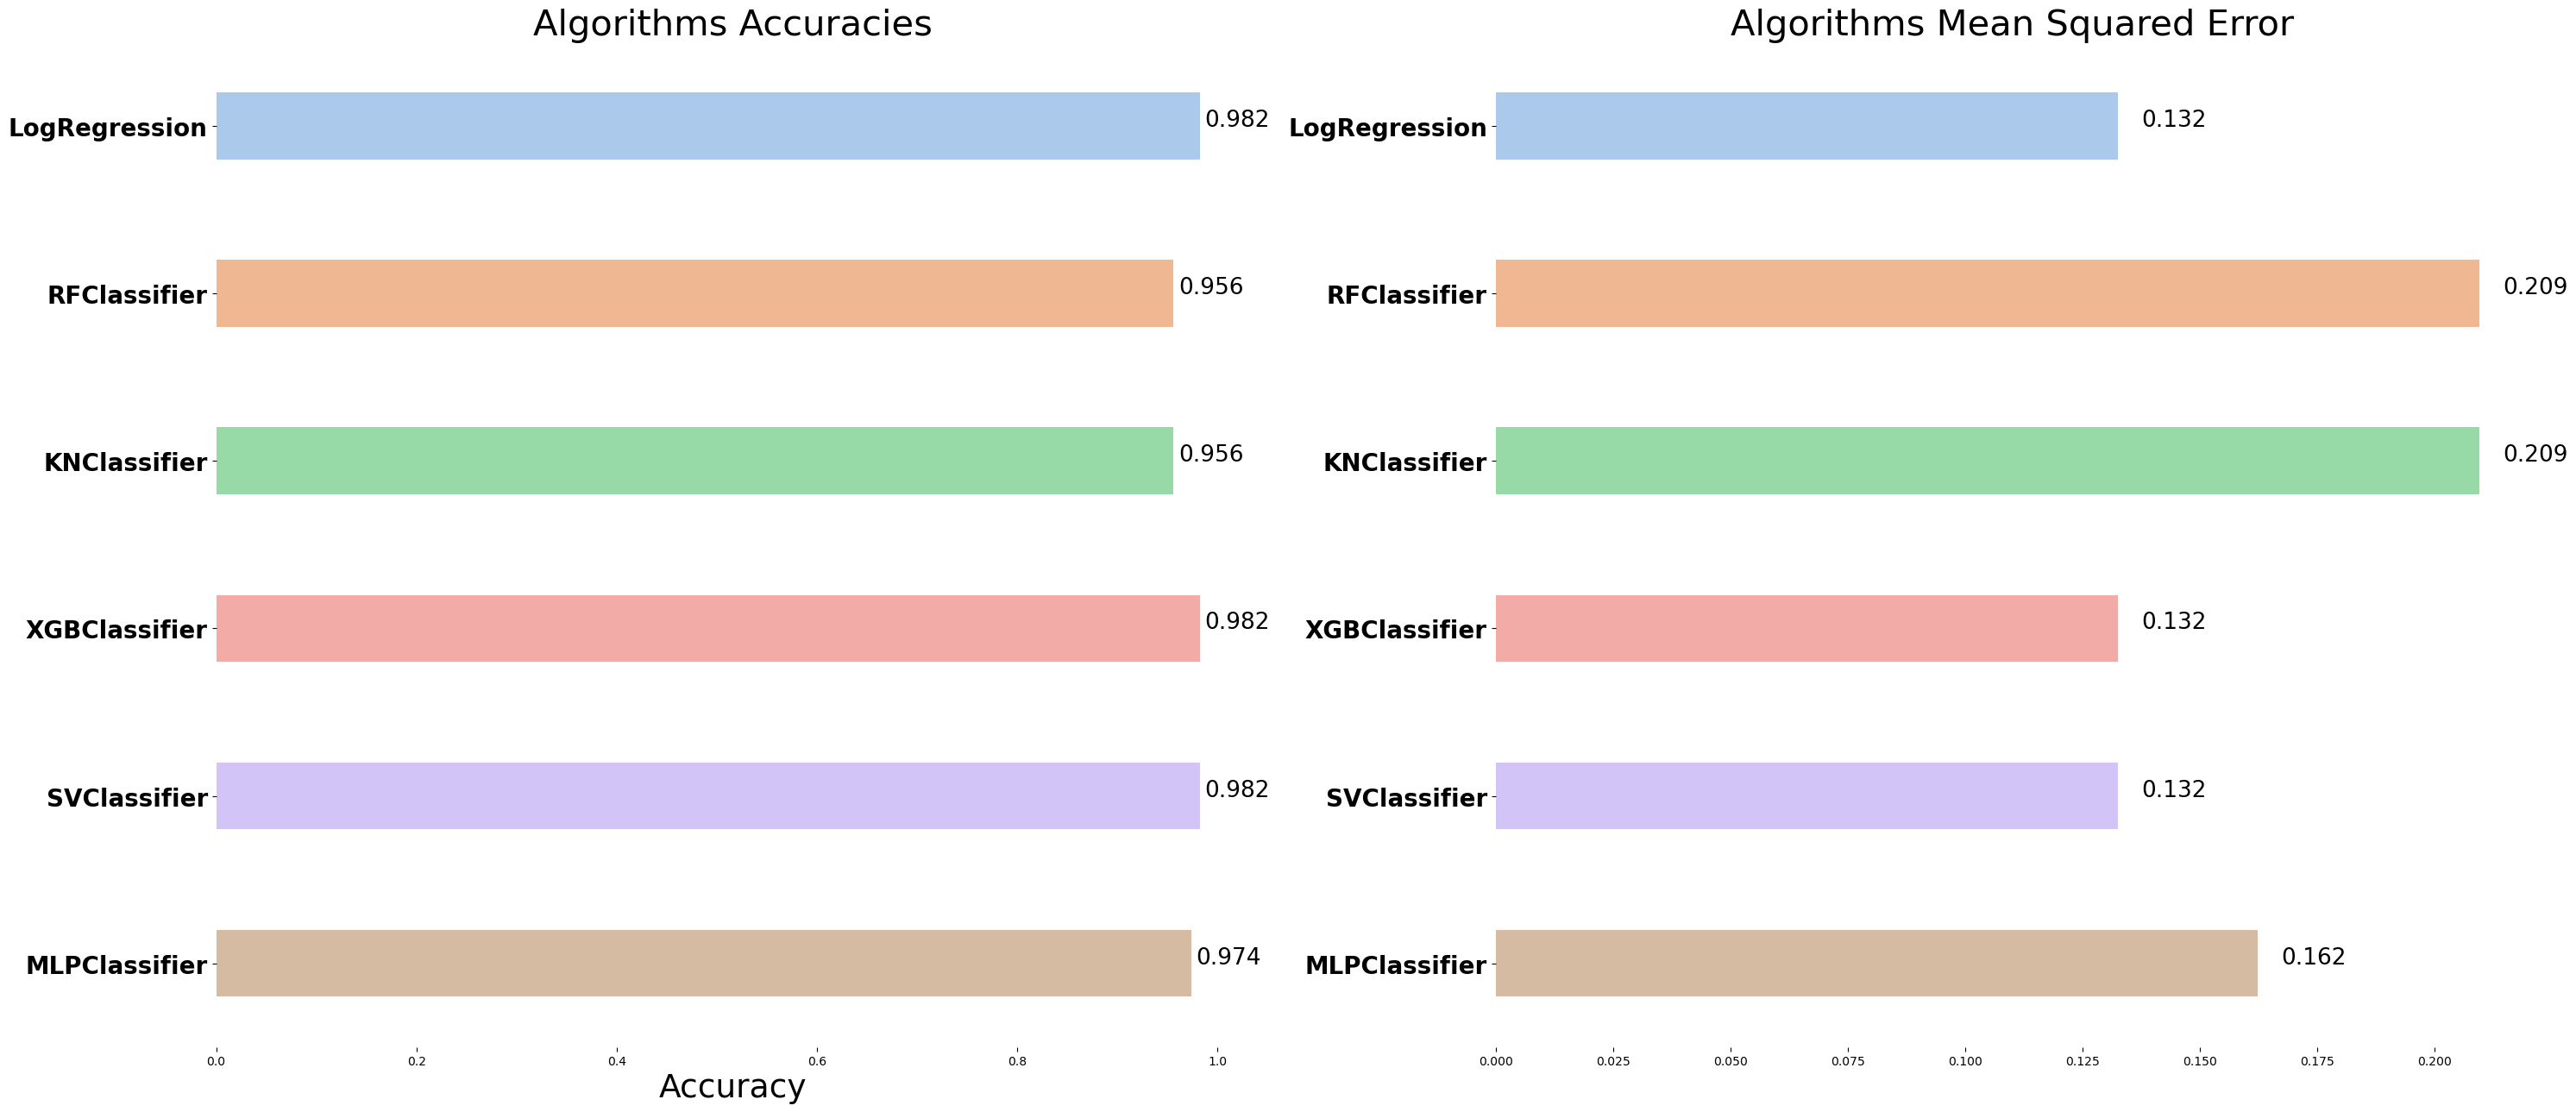

In [77]:
# Data for the first table
model_acc = [accuracy_log, accuracy_rf, accuracy_knn, accuracy_xgb, accuracy_svc, accuracy_mlp]
model_name1 = ['LogRegression', 'RFClassifier', 'KNClassifier', 'XGBClassifier', 'SVClassifier', 'MLPClassifier']

# Data for the second table
model_mse = [mse_log, mse_rf, mse_knn, mse_xgb, mse_svc, mse_mlp]
model_name2 = ['LogRegression', 'RFClassifier', 'KNClassifier', 'XGBClassifier', 'SVClassifier', 'MLPClassifier']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(30,13))

# First table
ax1 = sns.barplot(x=model_acc, y=model_name1, palette='pastel', width=0.4, ax=axs[0])
ax1.set_xlabel('Accuracy', fontsize=27)
ax1.set_title('Algorithms Accuracies', fontsize=30)


for i, v, in enumerate(model_acc):
    ax1.text(v + 0.005, i, f'{v:.3f}', color='black',fontsize=19)
ax1.set_yticklabels(ax1.get_yticklabels(), fontweight='bold', fontsize=20)



# Second table
ax2 = sns.barplot(x=model_mse, y=model_name2, palette='pastel', width=0.4, ax=axs[1])
ax2.set_xlabel('', fontsize=27)
ax2.set_title('Algorithms Mean Squared Error', fontsize=30)

for i, v in enumerate(model_mse):
    ax2.text(v + 0.005, i, f'{v:.3f}', color='black', fontsize=19)

ax2.set_yticklabels(ax2.get_yticklabels(),fontweight='bold', fontsize=20)


#Delete lines outside tables
sns.despine(left=True, bottom=True, right=True, ax=ax1)
sns.despine(left=True, bottom=True, right=True, ax=ax2)
# Set subplots
plt.tight_layout()
plt.show()

# Algorithms Confusion maxtrix

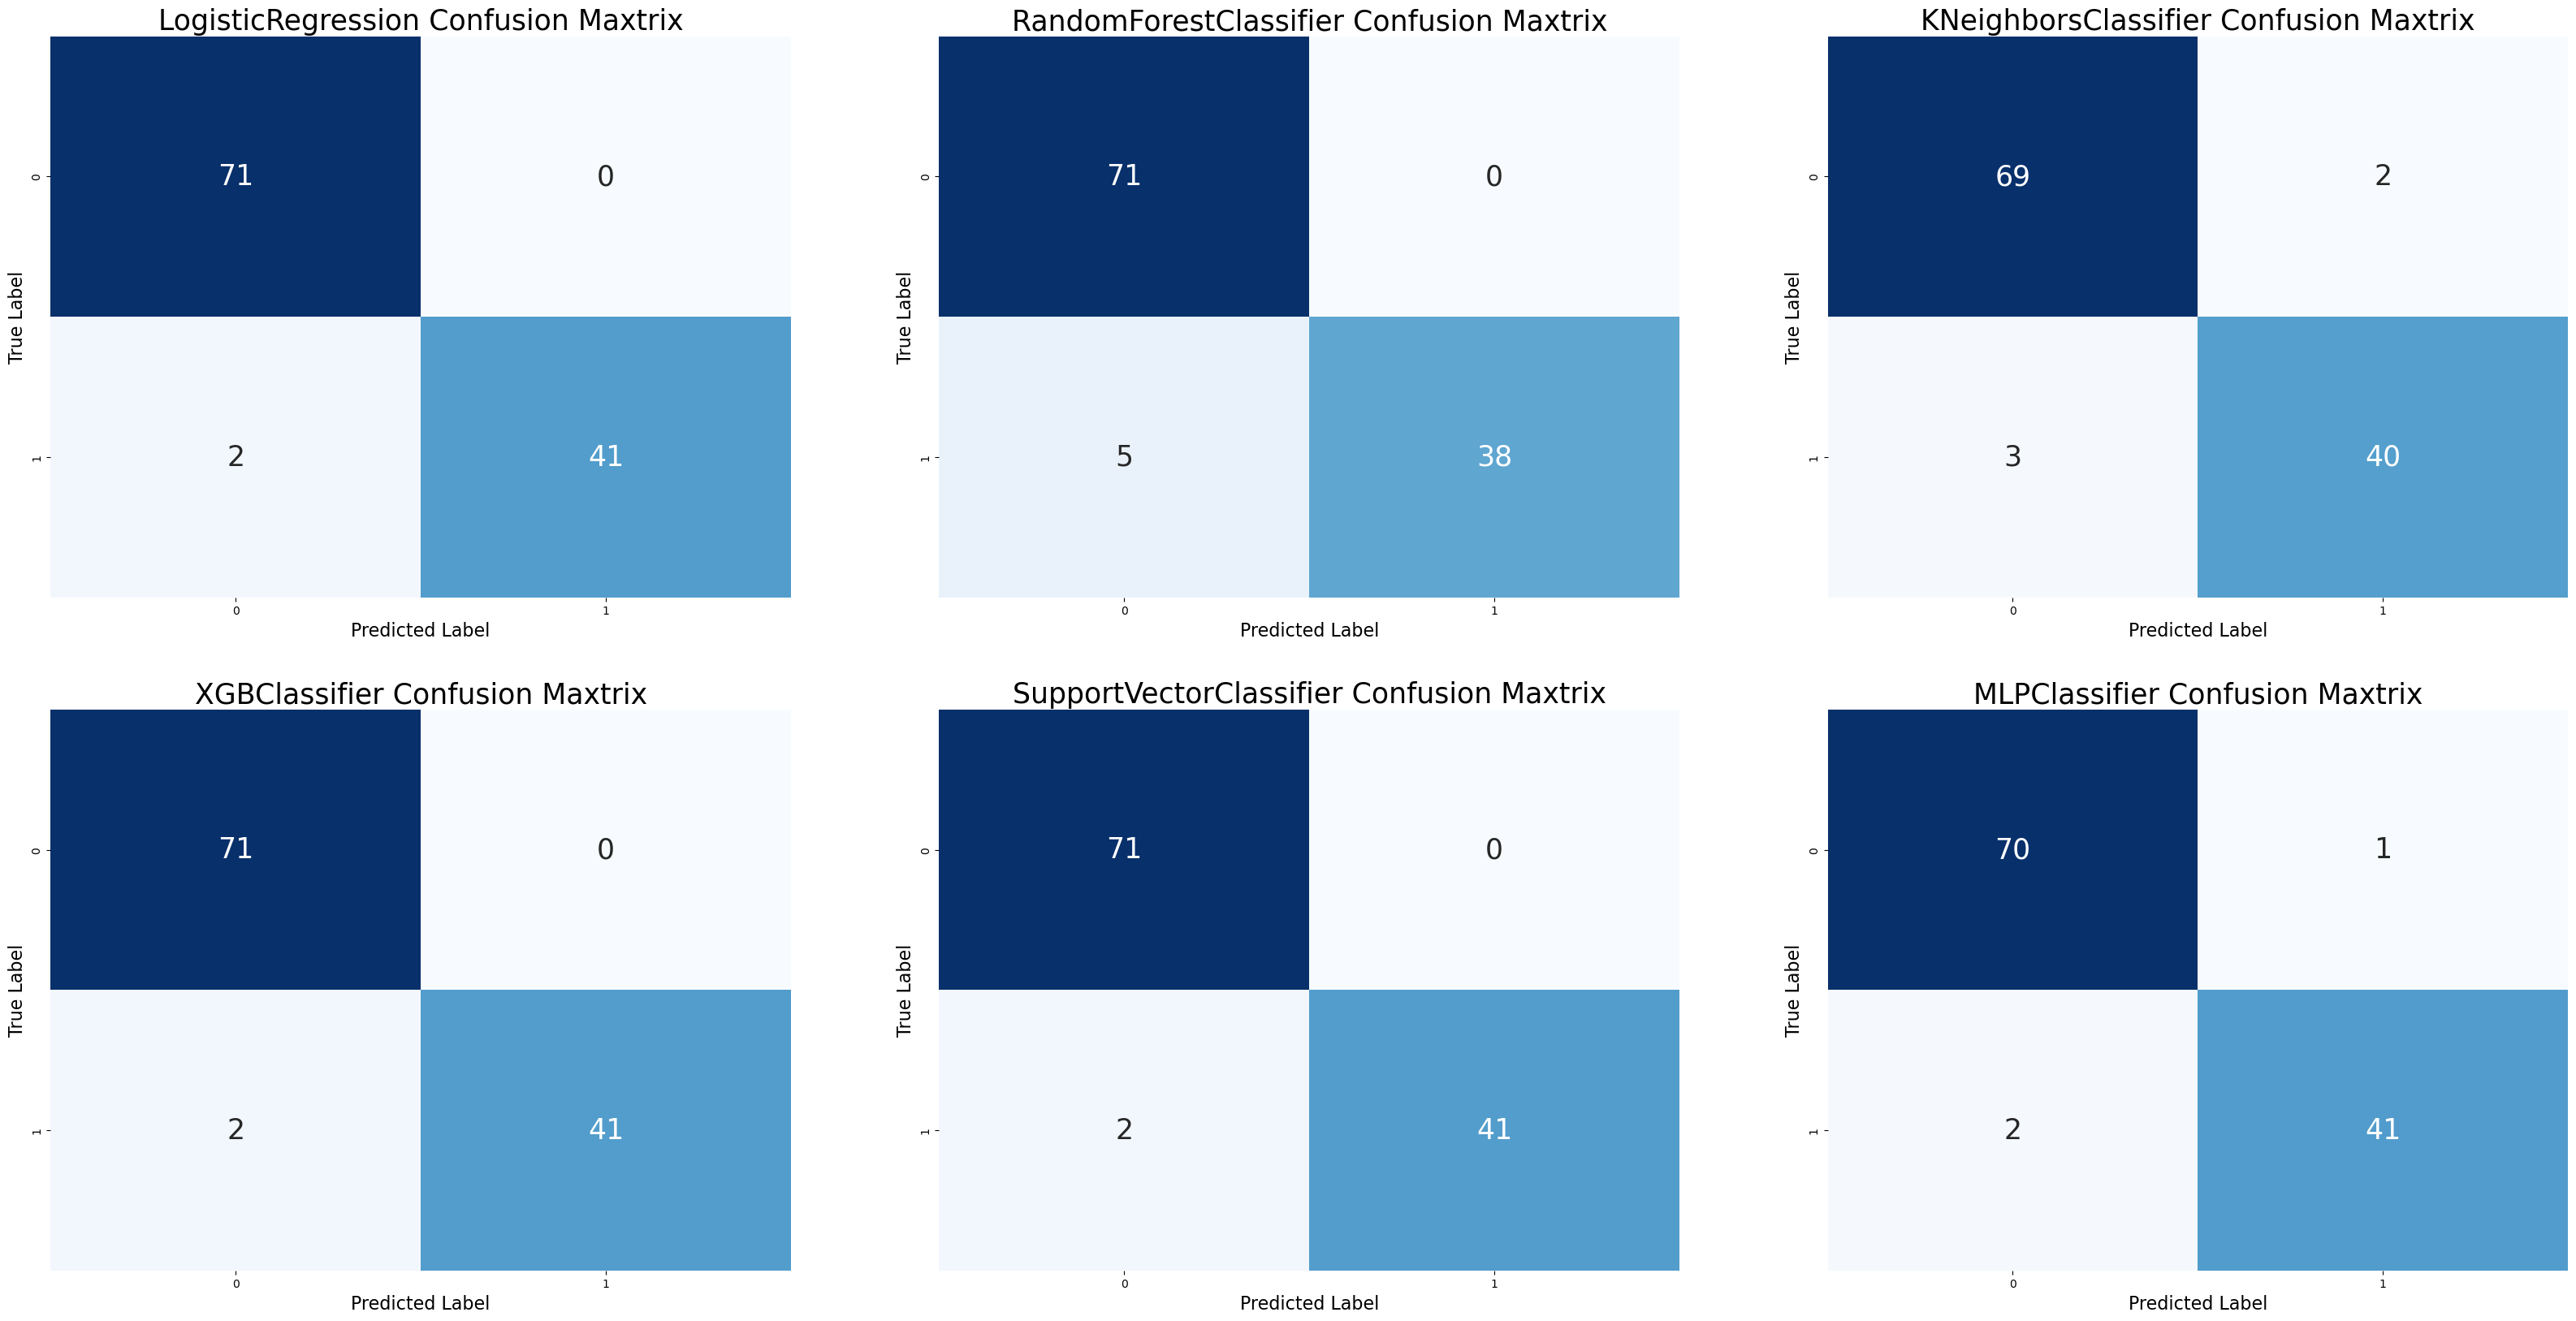

In [78]:
# Visualising Confusion Matrices
fig, axs = plt.subplots(2, 3, figsize=(40, 8))

axs = np.ravel(axs)

# 1. Confusion Matrix
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[0],annot_kws={"fontsize": 25})
axs[0].set_title('LogisticRegression Confusion Maxtrix',fontsize=25)
axs[0].set_xlabel('Predicted Label', fontsize=16)
axs[0].set_ylabel('True Label', fontsize=16)

# 2. Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[1],annot_kws={"fontsize": 25})
axs[1].set_title('RandomForestClassifier Confusion Maxtrix',fontsize=25)
axs[1].set_xlabel('Predicted Label', fontsize=16)
axs[1].set_ylabel('True Label', fontsize=16)

# 3. Confusion Matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[2],annot_kws={"fontsize": 25})
axs[2].set_title('KNeighborsClassifier Confusion Maxtrix',fontsize=25)
axs[2].set_xlabel('Predicted Label', fontsize=16)
axs[2].set_ylabel('True Label', fontsize=16)


# 4. Confusion Matrix
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[3],annot_kws={"fontsize": 25})
axs[3].set_title('XGBClassifier Confusion Maxtrix',fontsize=25)
axs[3].set_xlabel('Predicted Label', fontsize=16)
axs[3].set_ylabel('True Label', fontsize=16)

# 5. Confusion Matrix
sns.heatmap(conf_matrix_svc, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[4],annot_kws={"fontsize": 25})
axs[4].set_title('SupportVectorClassifier Confusion Maxtrix',fontsize=25)
axs[4].set_xlabel('Predicted Label', fontsize=16)
axs[4].set_ylabel('True Label', fontsize=16);

# 6. Confusion Matrix
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[5],annot_kws={"fontsize": 25})
axs[5].set_title('MLPClassifier Confusion Maxtrix',fontsize=25)
axs[5].set_xlabel('Predicted Label', fontsize=16)
axs[5].set_ylabel('True Label', fontsize=16)

# Üst ve alt boşlukları ayarla
plt.subplots_adjust(top=2, bottom=0.1);

# Algorithms Classification Report

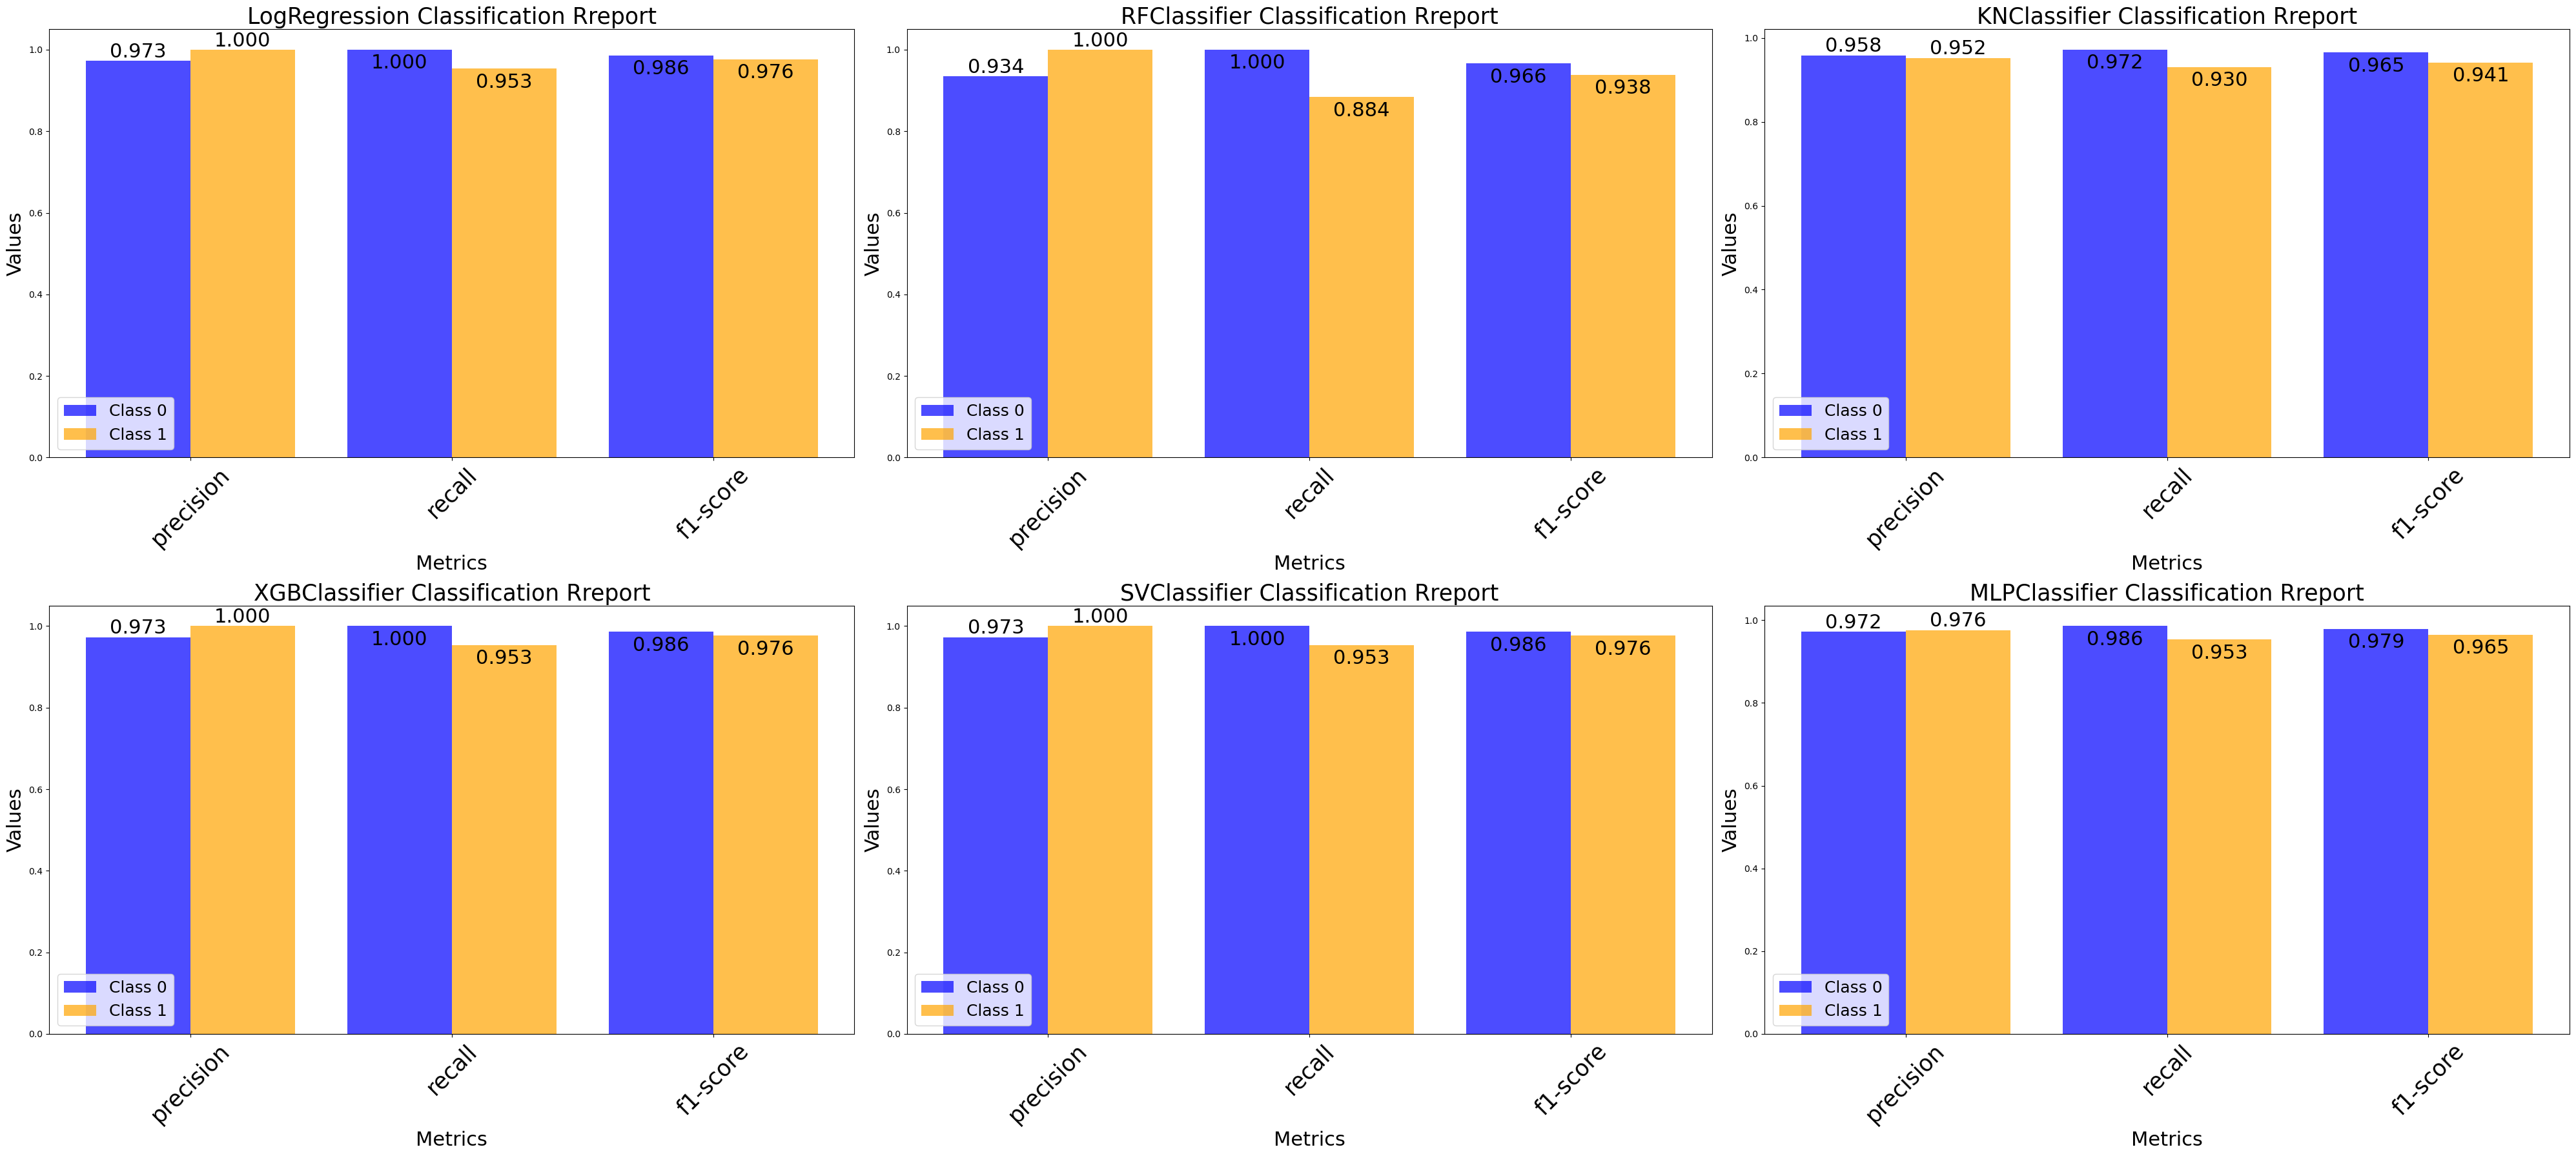

In [80]:
# Assume you have already calculated classification reports
class_repot_log = classification_report(y_test, y_pred_log, output_dict=True,labels=[0,1])
class_repot_rf = classification_report(y_test, y_pred_rf, output_dict=True,labels=[0,1])
class_repot_knn = classification_report(y_test, y_pred_knn, output_dict=True,labels=[0,1])
class_repot_xgb = classification_report(y_test, y_pred_xgb, output_dict=True,labels=[0,1])
class_repot_svc = classification_report(y_test, y_pred_svc, output_dict=True,labels=[0,1])
class_repot_mlp = classification_report(y_test, y_pred_mlp, output_dict=True,labels=[0,1])

# Visualise each classification report in a subplot
fig, axs = plt.subplots(2, 3, figsize=(40, 18))
axs = np.ravel(axs)

def plot_class_report(report, ax, title, class_labels=['0', '1']):
    # Convert text-based report to a DataFrame
    df = pd.DataFrame(report).transpose()
    df = df.drop(['support'], axis=1)
    
    # Separate metrics for class 0 and class 1
    df_class_0 = df.loc['0'].values.reshape(1, -1)
    df_class_1 = df.loc['1'].values.reshape(1, -1)
    
    # Visualisation with bar graph for each class
    ax.bar(np.arange(len(df.columns)), df_class_0.flatten(), width=0.4, label='Class 0', align='center', color='blue', alpha=0.7)
    ax.bar(np.arange(len(df.columns)) + 0.4, df_class_1.flatten(), width=0.4, label='Class 1', align='center', color='orange', alpha=0.7)
    
    ax.set_title(title, fontsize=25)
    ax.set_xticks(np.arange(len(df.columns)) + 0.2)
    ax.set_xticklabels(df.columns, rotation=45, fontsize=25)
    ax.set_xlabel('Metrics', fontsize=22)
    ax.set_ylabel('Values', fontsize=22)
    ax.legend(loc='lower left', fontsize=18)

    # Add values on each bar for both classes
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        if i % len(df.columns) < len(df.columns) // 2:
            ax.annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=22)
        else:
            ax.annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, -15), textcoords='offset points', fontsize=22)

# Visualise each classification report in a separate subplot
plot_class_report(class_repot_log, axs[0], 'LogRegression Classification Rreport')
plot_class_report(class_repot_rf, axs[1], 'RFClassifier Classification Rreport')
plot_class_report(class_repot_knn, axs[2], 'KNClassifier Classification Rreport')
plot_class_report(class_repot_xgb, axs[3], 'XGBClassifier Classification Rreport')
plot_class_report(class_repot_svc, axs[4], 'SVClassifier Classification Rreport')
plot_class_report(class_repot_mlp, axs[5], 'MLPClassifier Classification Rreport')

plt.tight_layout()
plt.show()


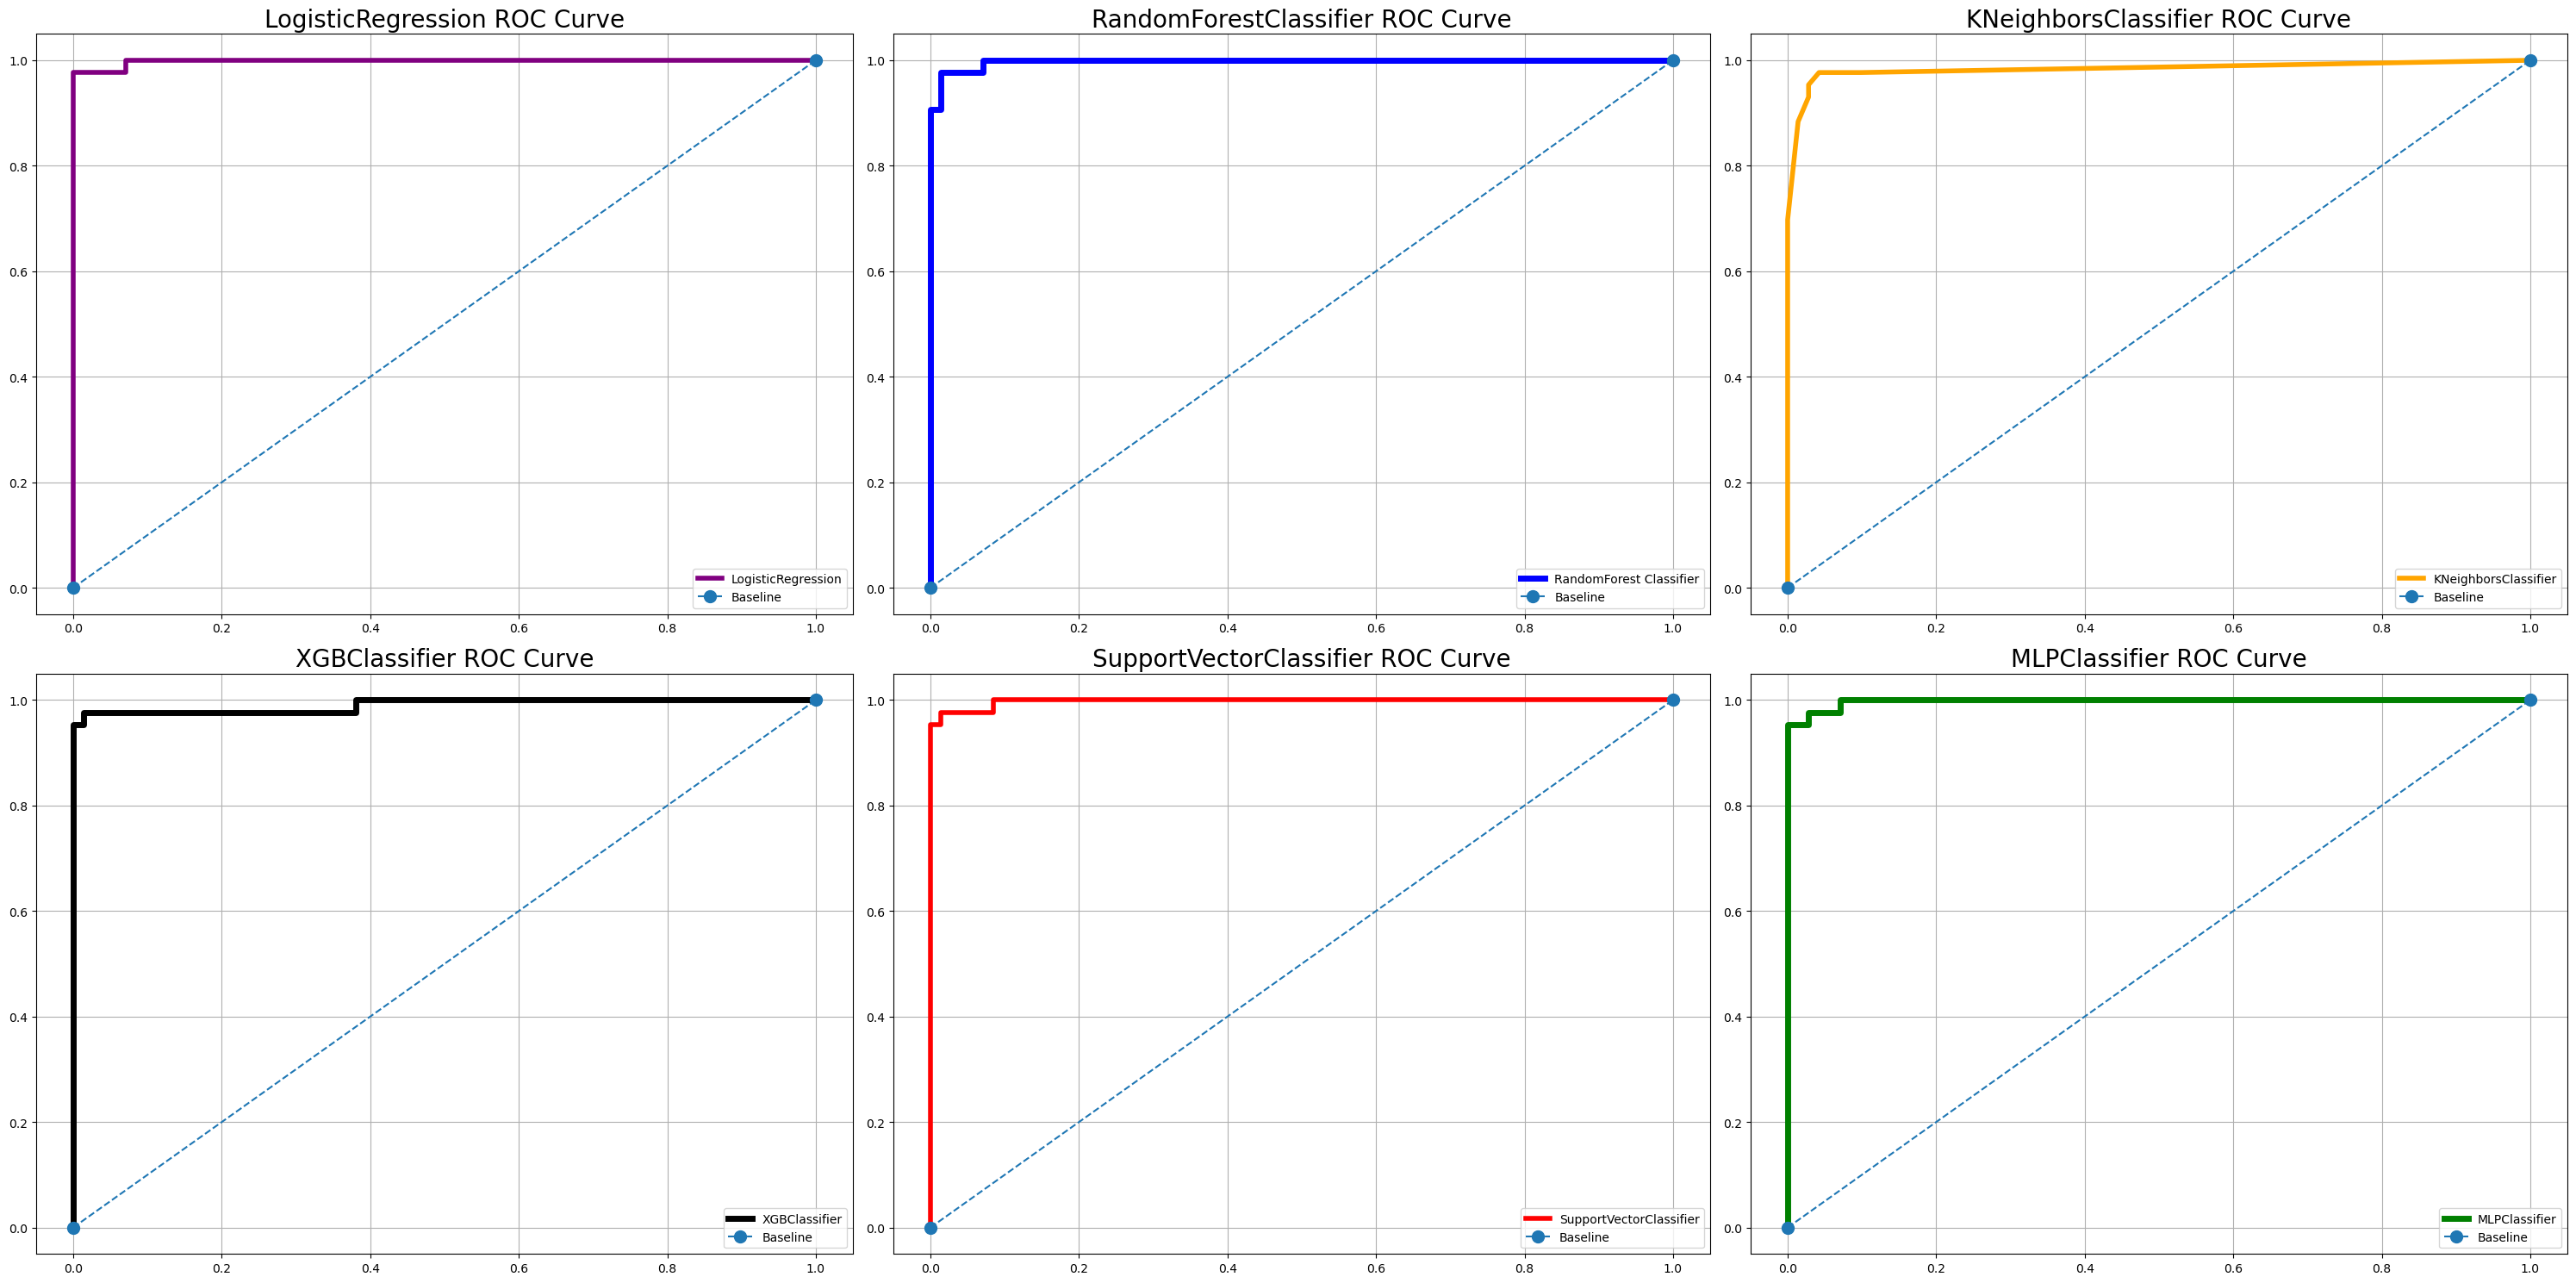

In [81]:
# ROC Curve'leri yanyana çiz
plt.figure(figsize=(30, 15))

# 1. ROC Curve
fpr_log,tpr_log,threshold_log=roc_curve(y_test,y_probsl)
plt.subplot(2, 3, 1)
plt.plot(fpr_log, tpr_log, 'purple', markersize=10, label='LogisticRegression', linewidth=4)
plt.plot([0, 1], [0, 1], 'o--', markersize=10, label='Baseline')  
plt.grid()
plt.legend()
plt.title('LogisticRegression ROC Curve',fontsize=20)

# 2. ROC Curve
fpr_rf,tpr_rf,threshold_rf=roc_curve(y_test,y_probsf)
plt.subplot(2, 3, 2)
plt.plot(fpr_rf, tpr_rf, 'b-', markersize=10, label='RandomForest Classifier', linewidth=5)
plt.plot([0, 1], [0, 1], 'o--', markersize=10, label='Baseline')  
plt.grid()
plt.legend()
plt.title('RandomForestClassifier ROC Curve',fontsize=20)

# 3. ROC Curve
fpr_knn,tpr_knn,threshold_knn=roc_curve(y_test,y_probsk)
plt.subplot(2, 3, 3)
plt.plot(fpr_knn, tpr_knn, 'orange', markersize=10, label='KNeighborsClassifier', linewidth=4)
plt.plot([0, 1], [0, 1], 'o--', markersize=10, label='Baseline')  
plt.grid()
plt.legend()
plt.title('KNeighborsClassifier ROC Curve',fontsize=20)

# 4. ROC Curve
fpr_xgb,tpr_xgb,threshold_xgb=roc_curve(y_test,y_probsx)
plt.subplot(2, 3, 4)
plt.plot(fpr_xgb, tpr_xgb, 'black', markersize=10, label='XGBClassifier', linewidth=5)
plt.plot([0, 1], [0, 1], 'o--', markersize=10, label='Baseline')  
plt.grid()
plt.legend()
plt.title('XGBClassifier ROC Curve',fontsize=20)

# 5. ROC Curve
fpr_svc,tpr_svc,threshold_svc=roc_curve(y_test,y_probsv)
plt.subplot(2, 3, 5)
plt.plot(fpr_svc, tpr_svc, 'red', markersize=10, label='SupportVectorClassifier', linewidth=4)
plt.plot([0, 1], [0, 1], 'o--', markersize=10, label='Baseline')  
plt.grid()
plt.legend()
plt.title('SupportVectorClassifier ROC Curve',fontsize=20)

# 5. ROC Curve
fpr_mlp,tpr_mlp,threshold_mlp=roc_curve(y_test,y_probsp)
plt.subplot(2, 3, 6)
plt.plot(fpr_mlp, tpr_mlp, 'green', markersize=10, label='MLPClassifier', linewidth=5)
plt.plot([0, 1], [0, 1], 'o--', markersize=10, label='Baseline')  
plt.grid()
plt.legend()
plt.title('MLPClassifier ROC Curve',fontsize=20)


plt.tight_layout()
plt.show()

# Algorithms ROC_AUC_Score;

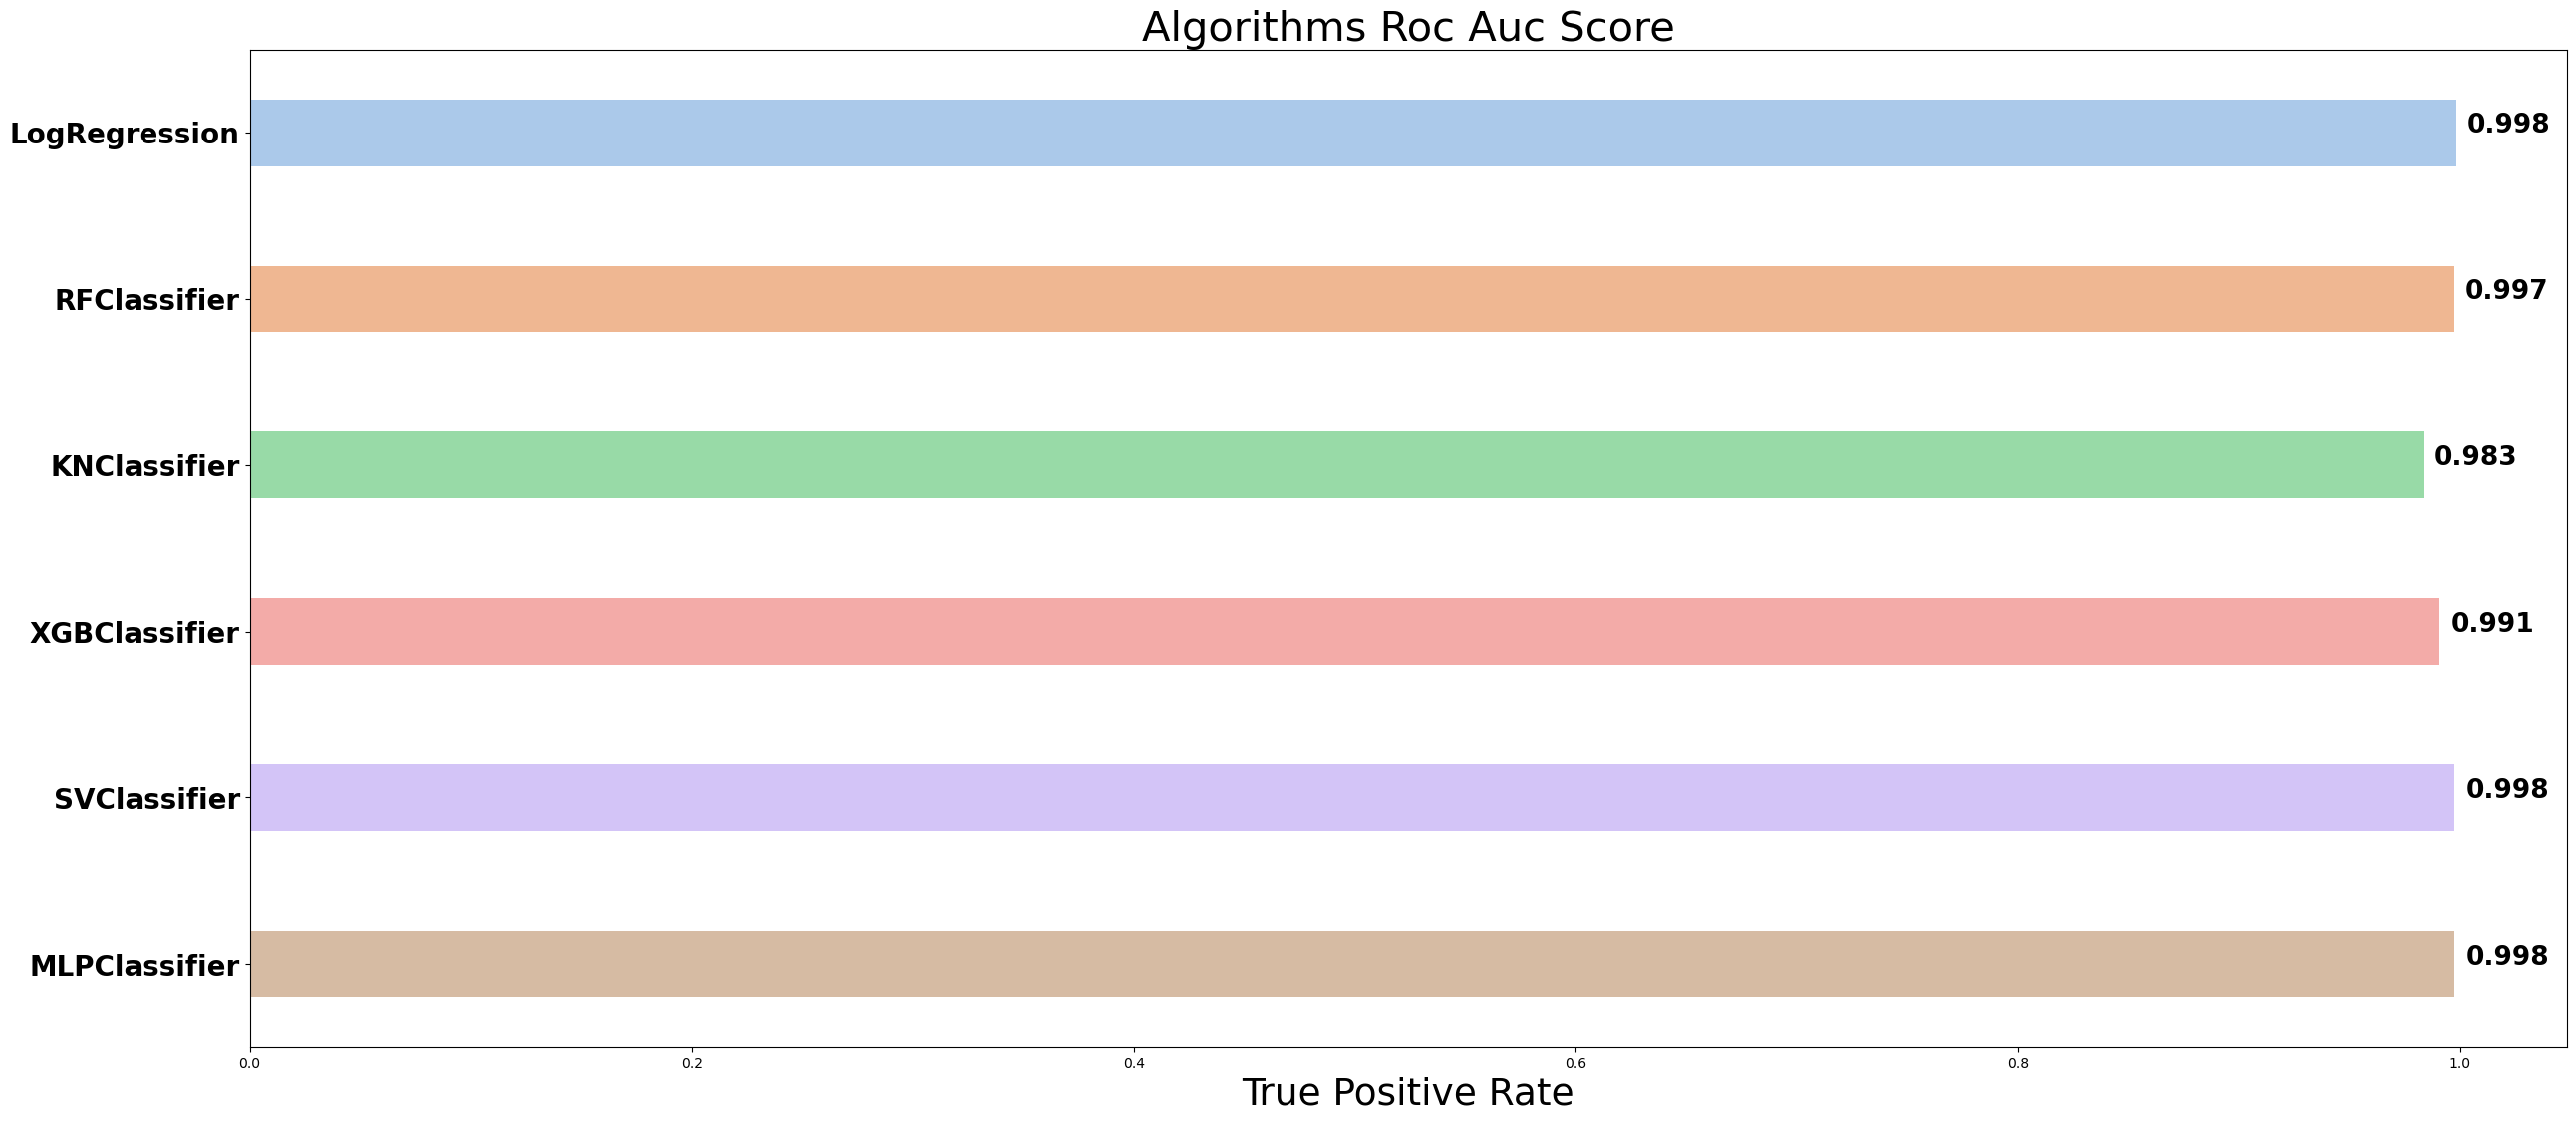

In [82]:
model_roc = [roc_log, roc_rf, roc_knn, roc_xgb,roc_svc,roc_mlp]
model_name1 = ['LogRegression', 'RFClassifier', 'KNClassifier', 'XGBClassifier', 'SVClassifier', 'MLPClassifier']

fig, axs = plt.subplots(figsize=(30, 13), nrows=1, ncols=1)

# İlk tablo
ax = sns.barplot(x=model_roc, y=model_name1, palette='pastel', width=0.4, ax=axs)
ax.set_xlabel('True Positive Rate', fontsize=27)
ax.set_title('Algorithms Roc Auc Score', fontsize=30)

for i, v in enumerate(model_roc):
    ax.text(v + 0.005, i, f'{v:.3f}', color='black', fontweight='bold',fontsize=19)

ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', fontsize=20)

plt.show()

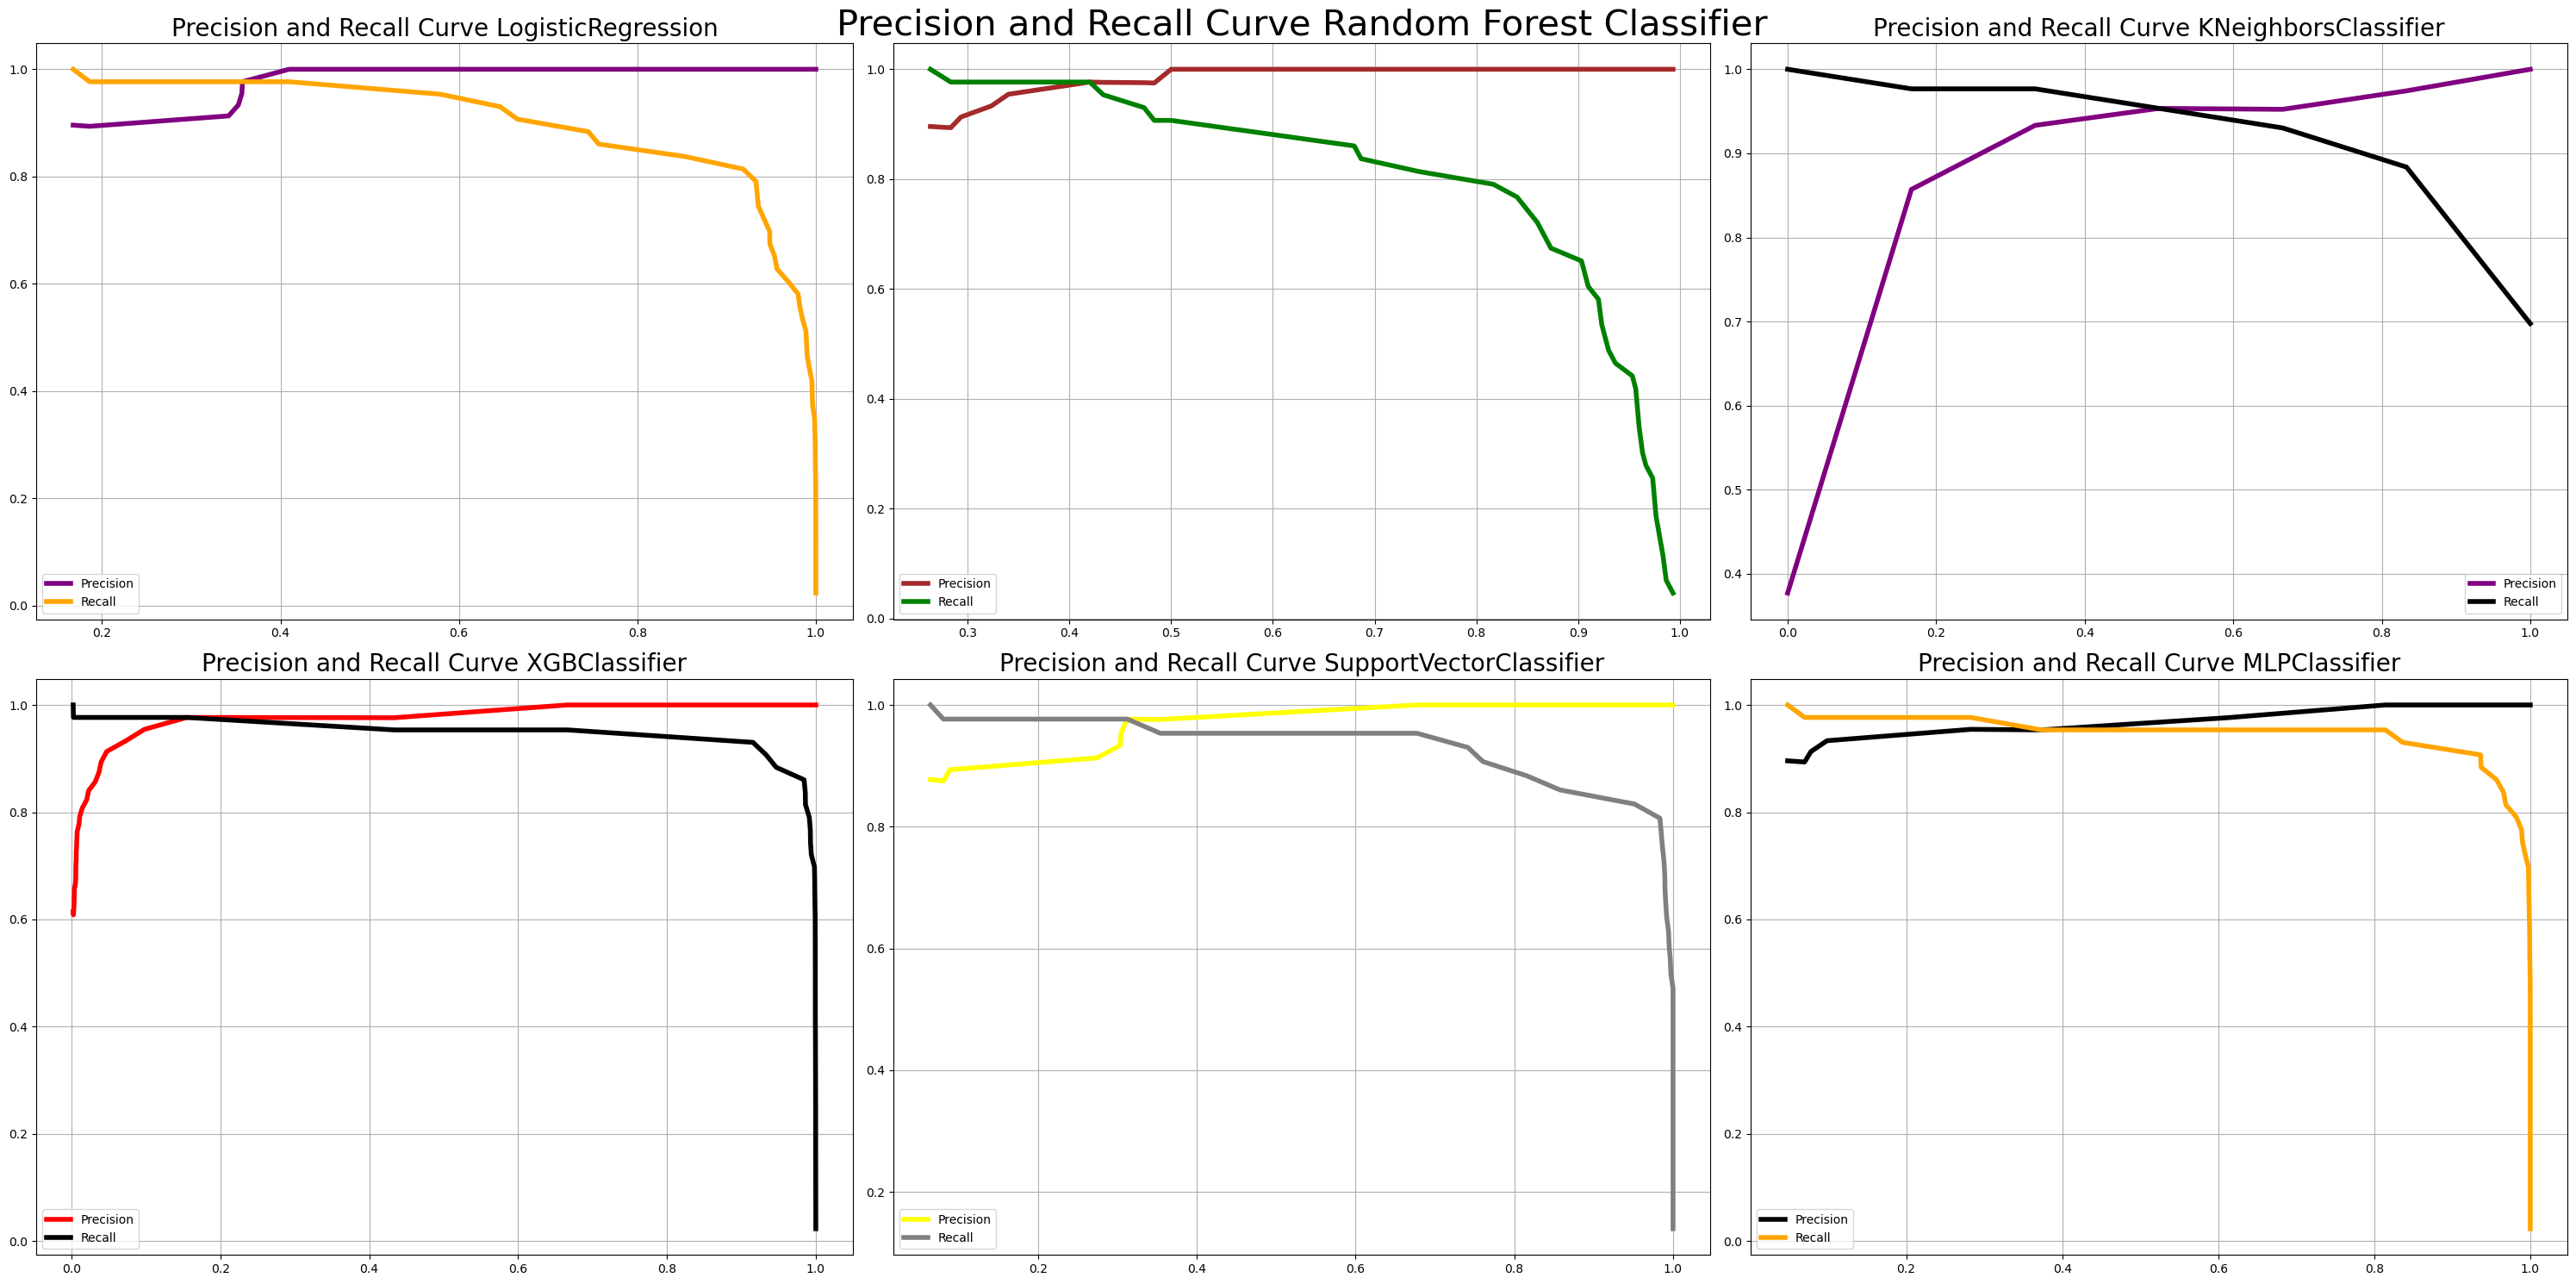

In [85]:
# Algorithms Precision Recall Curve;
plt.figure(figsize=(30, 15))
threshold=0.5


y_scoresl=log_tuned.predict_proba(X_test)[:, 1]
precision_valuesl, recall_valuesl,threshold_valuesl= precision_recall_curve(y_test,y_scoresl)
plt.subplot(2, 3, 1)
plt.plot(threshold_valuesl,precision_valuesl[:-1], 'purple',label='Precision',linewidth=4)
plt.plot(threshold_valuesl,recall_valuesl[:-1], 'orange',label='Recall',linewidth=4)
plt.grid()
plt.legend()
plt.title('Precision and Recall Curve LogisticRegression',fontsize=20)


y_scoresf=rf_tuned.predict_proba(X_test)[:, 1]
precision_valuesf, recall_valuesf,threshold_valuesf= precision_recall_curve(y_test,y_scoresf)
plt.subplot(2, 3, 2)
plt.plot(threshold_valuesf,precision_valuesf[:-1], 'brown',label='Precision',linewidth=4)
plt.plot(threshold_valuesf,recall_valuesf[:-1], 'g-',label='Recall',linewidth=4)
plt.title('Precision and Recall Curve Random Forest Classifier',fontsize=30)
plt.grid()
plt.legend();



y_scoresk=knn_tuned.predict_proba(X_test)[:, 1]
precision_valuesk, recall_valuesk,threshold_valuesk= precision_recall_curve(y_test,y_scoresk)
plt.subplot(2, 3, 3)
plt.plot(threshold_valuesk,precision_valuesk[:-1], 'purple',label='Precision',linewidth=4)
plt.plot(threshold_valuesk,recall_valuesk[:-1], 'black',label='Recall',linewidth=4)
plt.grid()
plt.legend()
plt.title('Precision and Recall Curve KNeighborsClassifier',fontsize=20)


y_scoresx=xgb_tuned.predict_proba(X_test)[:, 1]
precision_valuesx, recall_valuesx,threshold_valuesx= precision_recall_curve(y_test,y_scoresx)
plt.subplot(2, 3, 4)
plt.plot(threshold_valuesx,precision_valuesx[:-1], 'red',label='Precision',linewidth=4)
plt.plot(threshold_valuesx,recall_valuesx[:-1], 'black',label='Recall',linewidth=4)
plt.grid()
plt.legend()
plt.title('Precision and Recall Curve XGBClassifier',fontsize=20)


y_scoress=svc_tuned.predict_proba(X_test)[:, 1]
precision_valuess, recall_valuess,threshold_valuess= precision_recall_curve(y_test,y_scoress)
plt.subplot(2, 3, 5)
plt.plot(threshold_valuess,precision_valuess[:-1], 'yellow',label='Precision',linewidth=4)
plt.plot(threshold_valuess,recall_valuess[:-1], 'gray',label='Recall',linewidth=4)
plt.grid()
plt.legend()
plt.title('Precision and Recall Curve SupportVectorClassifier',fontsize=20)


y_scoresm=mlp_tuned.predict_proba(X_test)[:, 1]
precision_valuesm, recall_valuesm,threshold_valuesm= precision_recall_curve(y_test,y_scoresm)
plt.subplot(2, 3, 6)
plt.plot(threshold_valuesm,precision_valuesm[:-1], 'black',label='Precision',linewidth=4)
plt.plot(threshold_valuesm,recall_valuesm[:-1], 'orange',label='Recall',linewidth=4)
plt.grid()
plt.legend()
plt.title('Precision and Recall Curve MLPClassifier',fontsize=20)


plt.tight_layout()
plt.show()